<a href="https://colab.research.google.com/github/sagarg0812/Sagarproject/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
import matplotlib 
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/DriveMyScream/Python_libraries/main/weatherAUS.csv")

In [5]:
rows, columns = df.shape
print("The Number of rows in the dataset is:", rows)
print("The Number of columns in the dataset is:", columns)

The Number of rows in the dataset is: 145460
The Number of columns in the dataset is: 23


### The first five data rows:

In [6]:
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [7]:
df.tail(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

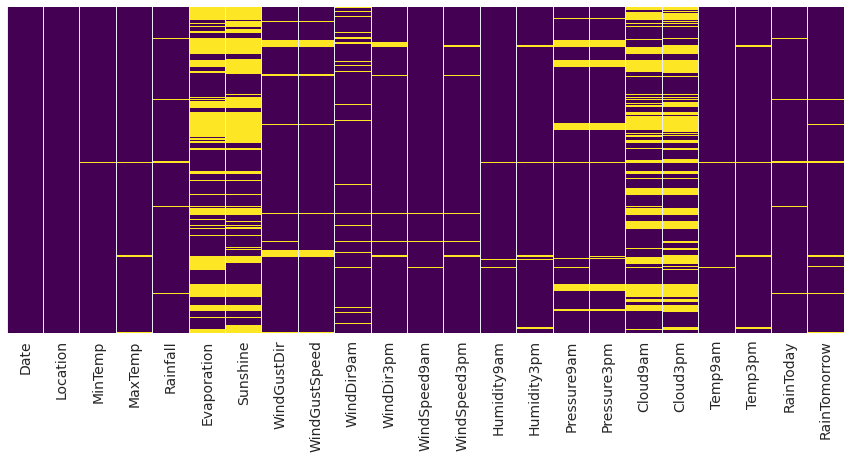

In [9]:
plt.figure(figsize=(15, 6)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [10]:
Missing_data = pd.DataFrame({'Missing count': df.isnull().sum(), 'Missing Percentage': (df.isnull().sum()/df.shape[0])*100})
Missing_data

Missing count  Missing Percentage
Date                       0            0.000000
Location                   0            0.000000
MinTemp                 1485            1.020899
MaxTemp                 1261            0.866905
Rainfall                3261            2.241853
Evaporation            62790           43.166506
Sunshine               69835           48.009762
WindGustDir            10326            7.098859
WindGustSpeed          10263            7.055548
WindDir9am             10566            7.263853
WindDir3pm              4228            2.906641
WindSpeed9am            1767            1.214767
WindSpeed3pm            3062            2.105046
Humidity9am             2654            1.824557
Humidity3pm             4507            3.098446
Pressure9am            15065           10.356799
Pressure3pm            15028           10.331363
Cloud9am               55888           38.421559
Cloud3pm               59358           40.807095
Temp9am                 1767            1.214767
Temp3pm                 3609            2.481094
RainToday               3261            2.241853
RainTomorrow            3267            2.245978

In [11]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
df.fillna({"WindGustDir": df['WindGustDir'].mode()[0], 
               "WindDir9am": df['WindDir9am'].mode()[0],
               "WindDir3pm": df['WindDir3pm'].mode()[0],
               "RainToday": df['RainToday'].mode()[0],
               "RainTomorrow": df['RainTomorrow'].mode()[0]}, inplace=True)

In [13]:
Missing_data = pd.DataFrame({'Missing count': df.isnull().sum(), 'Missing Percentage': (df.isnull().sum()/df.shape[0])*100})
Missing_data

Missing count  Missing Percentage
Date                       0                 0.0
Location                   0                 0.0
MinTemp                    0                 0.0
MaxTemp                    0                 0.0
Rainfall                   0                 0.0
Evaporation                0                 0.0
Sunshine                   0                 0.0
WindGustDir                0                 0.0
WindGustSpeed              0                 0.0
WindDir9am                 0                 0.0
WindDir3pm                 0                 0.0
WindSpeed9am               0                 0.0
WindSpeed3pm               0                 0.0
Humidity9am                0                 0.0
Humidity3pm                0                 0.0
Pressure9am                0                 0.0
Pressure3pm                0                 0.0
Cloud9am                   0                 0.0
Cloud3pm                   0                 0.0
Temp9am                    0                 0.0
Temp3pm                    0                 0.0
RainToday                  0                 0.0
RainTomorrow               0                 0.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [15]:
idx = pd.DatetimeIndex(df['Date'])
df['Date'] = idx
df['MinTemp'] = df['MinTemp'].astype(np.float32)
df['MaxTemp'] = df['MaxTemp'].astype(np.float32)
df['Rainfall'] = df['Rainfall'].astype(np.float32)
df['Evaporation'] = df['Evaporation'].astype(np.float32)
df['Sunshine'] = df['Sunshine'].astype(np.float32)
df['WindGustSpeed'] = df['WindGustSpeed'].astype(np.float32)
df['WindSpeed9am'] = df['WindSpeed9am'].astype(np.float32)
df['WindSpeed3pm'] = df['WindSpeed3pm'].astype(np.float32)
df['Humidity9am'] = df['Humidity9am'].astype(np.float32)
df['Humidity3pm'] = df['Humidity3pm'].astype(np.float32)
df['Pressure9am'] = df['Pressure9am'].astype(np.float32)
df['Pressure3pm'] = df['Pressure3pm'].astype(np.float32)
df['Cloud9am'] = df['Cloud9am'].astype(np.float32)
df['Cloud3pm'] = df['Cloud3pm'].astype(np.float32)
df['Temp9am'] = df['Temp9am'].astype(np.float32)
df['Temp3pm'] = df['Temp3pm'].astype(np.float32)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float32       
 3   MaxTemp        145460 non-null  float32       
 4   Rainfall       145460 non-null  float32       
 5   Evaporation    145460 non-null  float32       
 6   Sunshine       145460 non-null  float32       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float32       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float32       
 12  WindSpeed3pm   145460 non-null  float32       
 13  Humidity9am    145460 non-null  float32       
 14  Humidity3pm    145460 non-null  float32       
 15  

In [17]:
datatype = df.dtypes
numerical_columns = datatype[datatype == 'float32'].index.tolist()
categorical_columns = datatype[datatype == 'object'].index.tolist()

In [18]:
print("The Numerical Columns:", numerical_columns)

The Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [19]:
print("The Categorical Columns:", categorical_columns)

The Categorical Columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
df[categorical_columns].nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [21]:
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes'
                                       else 0 )
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes'
                                        else 0)

In [22]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [23]:
print("Soo we have a total {} number of city data points".format(len(df['Location'].unique())))

Soo we have a total 49 number of city data points


In [24]:
df['WindGustDir'].value_counts()

W      20241
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

In [25]:
df['RainToday'].unique()

array([0, 1])

In [26]:
df['RainTomorrow'].unique()

array([0, 1])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float32       
 3   MaxTemp        145460 non-null  float32       
 4   Rainfall       145460 non-null  float32       
 5   Evaporation    145460 non-null  float32       
 6   Sunshine       145460 non-null  float32       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float32       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float32       
 12  WindSpeed3pm   145460 non-null  float32       
 13  Humidity9am    145460 non-null  float32       
 14  Humidity3pm    145460 non-null  float32       
 15  

In [28]:
correlation_matrix = df.corr()
correlation_matrix

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.733400  0.102706     0.351321  0.051297   
MaxTemp        0.733400  1.000000 -0.074040     0.438653  0.328931   
Rainfall       0.102706 -0.074040  1.000000    -0.037863 -0.170973   
Evaporation    0.351321  0.438653 -0.037863     1.000000  0.288169   
Sunshine       0.051297  0.328931 -0.170973     0.288169  1.000000   
WindGustSpeed  0.172553  0.065895  0.126446     0.147353 -0.023844   
WindSpeed9am   0.173404  0.014294  0.085925     0.139968  0.003843   
WindSpeed3pm   0.173058  0.049717  0.056527     0.094352  0.037836   
Humidity9am   -0.230970 -0.497927  0.221380    -0.373732 -0.348855   
Humidity3pm    0.005995 -0.498760  0.248905    -0.286025 -0.443121   
Pressure9am   -0.423584 -0.308309 -0.159055    -0.210961  0.031406   
Pressure3pm   -0.433147 -0.396622 -0.119541    -0.230351 -0.014815   
Cloud9am       0.062151 -0.225315  0.171144    -0.150264 -0.532497   
Cloud3pm       0.016722 -0.212760  0.145343    -0.145472 -0.553853   
Temp9am        0.897692  0.879170  0.011069     0.414592  0.208580   
Temp3pm        0.699211  0.968713 -0.077684     0.425573  0.346685   
RainToday      0.054559 -0.225439  0.499899    -0.139275 -0.235296   
RainTomorrow   0.082173 -0.156851  0.233900    -0.088288 -0.321533   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.172553      0.173404      0.173058    -0.230970   
MaxTemp             0.065895      0.014294      0.049717    -0.497927   
Rainfall            0.126446      0.085925      0.056527     0.221380   
Evaporation         0.147353      0.139968      0.094352    -0.373732   
Sunshine           -0.023844      0.003843      0.037836    -0.348855   
WindGustSpeed       1.000000      0.577319      0.657243    -0.207964   
WindSpeed9am        0.577319      1.000000      0.512427    -0.268271   
WindSpeed3pm        0.657243      0.512427      1.000000    -0.143458   
Humidity9am        -0.207964     -0.268271     -0.143458     1.000000   
Humidity3pm        -0.025355     -0.030887      0.016275     0.659072   
Pressure9am        -0.425760     -0.215339     -0.277604     0.131503   
Pressure3pm        -0.383938     -0.165388     -0.239659     0.176009   
Cloud9am            0.052417      0.019714      0.041611     0.353490   
Cloud3pm            0.079927      0.041667      0.019813     0.273314   
Temp9am             0.145904      0.127592      0.161060    -0.469641   
Temp3pm             0.031884      0.004476      0.027587    -0.490709   
RainToday           0.145700      0.098636      0.077076     0.347034   
RainTomorrow        0.220442      0.086661      0.084207     0.251470   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.005995    -0.423584    -0.433147  0.062151  0.016722   
MaxTemp          -0.498760    -0.308309    -0.396622 -0.225315 -0.212760   
Rainfall          0.248905    -0.159055    -0.119541  0.171144  0.145343   
Evaporation      -0.286025    -0.210961    -0.230351 -0.150264 -0.145472   
Sunshine         -0.443121     0.031406    -0.014815 -0.532497 -0.553853   
WindGustSpeed    -0.025355    -0.425760    -0.383938  0.052417  0.079927   
WindSpeed9am     -0.030887    -0.215339    -0.165388  0.019714  0.041667   
WindSpeed3pm      0.016275    -0.277604    -0.239659  0.041611  0.019813   
Humidity9am       0.659072     0.131503     0.176009  0.353490  0.273314   
Humidity3pm       1.000000    -0.025848     0.048695  0.398762  0.406605   
Pressure9am      -0.025848     1.000000     0.959662 -0.101611 -0.114425   
Pressure3pm       0.048695     0.959662     1.000000 -0.047718 -0.065929   
Cloud9am          0.398762    -0.101611    -0.047718  1.000000  0.559800   
Cloud3pm          0.406605    -0.114425    -0.065929  0.559800  1.000000   
Temp9am          -0.216964    -0.397131    -0.441459 -0.108986 -0.098697   
Temp3pm          -0.555608    -0.265532    -0.360707 -0.231807 -0.246754   
RainT

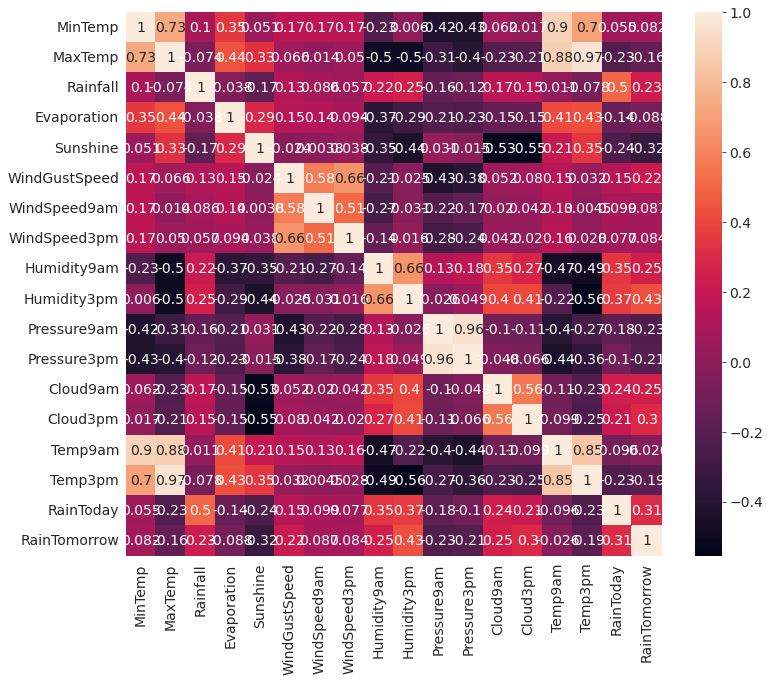

In [29]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show();

In [30]:
correlation_matrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.433179
RainToday        0.305744
Cloud3pm         0.298050
Humidity9am      0.251470
Cloud9am         0.249978
Rainfall         0.233900
WindGustSpeed    0.220442
WindSpeed9am     0.086661
WindSpeed3pm     0.084207
MinTemp          0.082173
Temp9am         -0.025555
Evaporation     -0.088288
MaxTemp         -0.156851
Temp3pm         -0.187806
Pressure3pm     -0.211977
Pressure9am     -0.230975
Sunshine        -0.321533
Name: RainTomorrow, dtype: float64

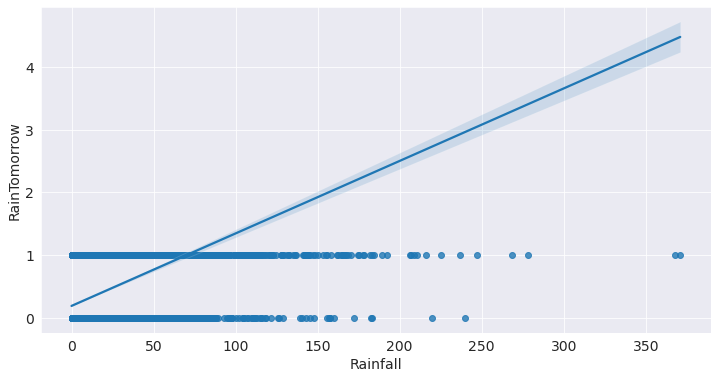

In [31]:
sns.regplot(x="Rainfall", y="RainTomorrow", data=df);

In [32]:
df[["Rainfall", "RainTomorrow"]].corr()

Rainfall  RainTomorrow
Rainfall        1.0000        0.2339
RainTomorrow    0.2339        1.0000

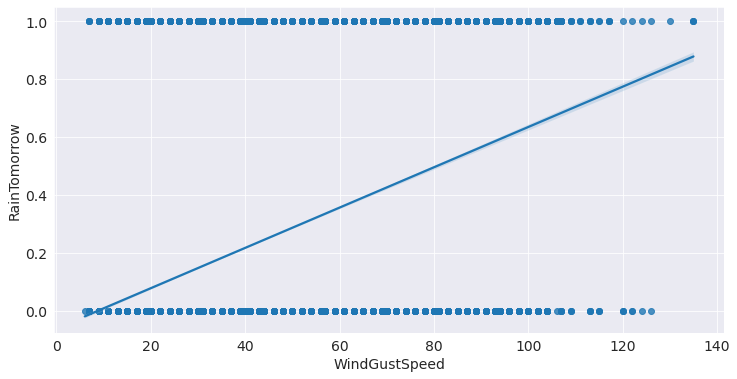

In [33]:
sns.regplot(x="WindGustSpeed", y="RainTomorrow", data=df);

In [34]:
df[["WindGustSpeed", "RainTomorrow"]].corr()

WindGustSpeed  RainTomorrow
WindGustSpeed       1.000000      0.220442
RainTomorrow        0.220442      1.000000

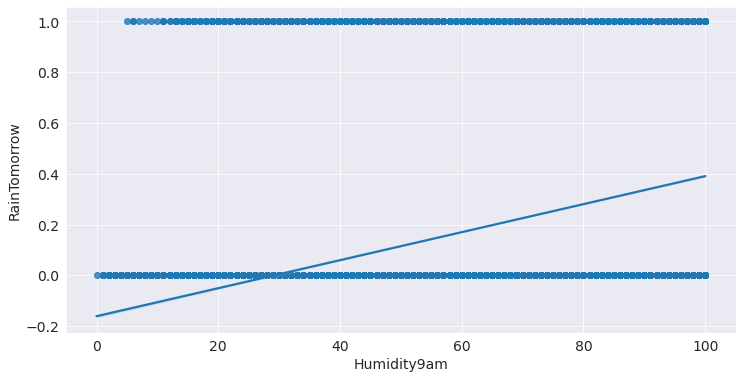

In [35]:
sns.regplot(x="Humidity9am", y="RainTomorrow", data=df);

In [36]:
df[["Humidity9am", "RainTomorrow"]].corr()

Humidity9am  RainTomorrow
Humidity9am       1.00000       0.25147
RainTomorrow      0.25147       1.00000

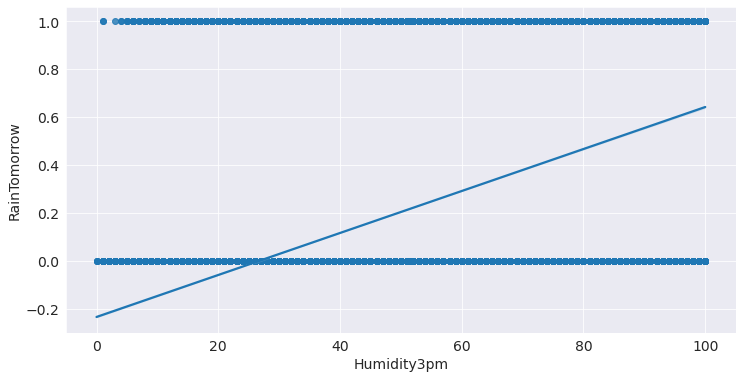

In [37]:
sns.regplot(x="Humidity3pm", y="RainTomorrow", data=df);

In [38]:
df[["Humidity3pm", "RainTomorrow"]].corr()

Humidity3pm  RainTomorrow
Humidity3pm      1.000000      0.433179
RainTomorrow     0.433179      1.000000

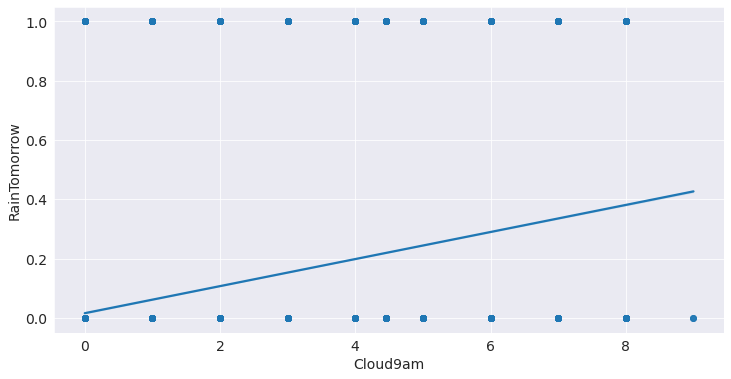

In [39]:
sns.regplot(x="Cloud9am", y="RainTomorrow", data=df);

In [40]:
df[["Cloud9am", "RainTomorrow"]].corr()

Cloud9am  RainTomorrow
Cloud9am      1.000000      0.249978
RainTomorrow  0.249978      1.000000

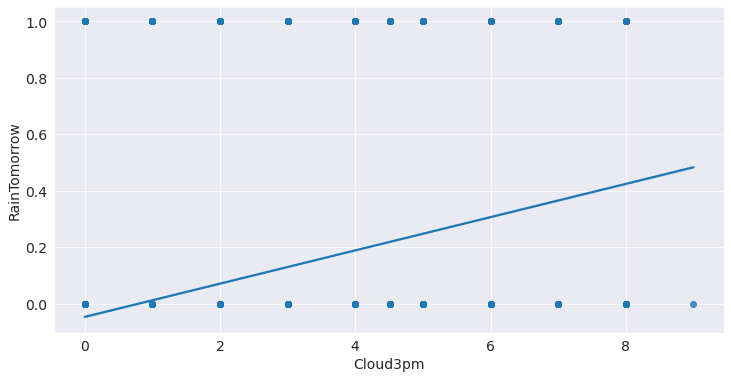

In [41]:
sns.regplot(x="Cloud3pm", y="RainTomorrow", data=df);

In [42]:
df[["Cloud3pm", "RainTomorrow"]].corr()

Cloud3pm  RainTomorrow
Cloud3pm       1.00000       0.29805
RainTomorrow   0.29805       1.00000

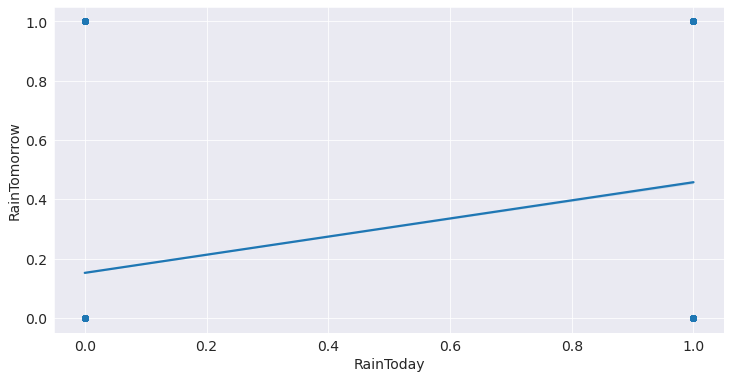

In [43]:
sns.regplot(x="RainToday", y="RainTomorrow", data=df);

In [44]:
df[["RainToday", "RainTomorrow"]].corr()

RainToday  RainTomorrow
RainToday      1.000000      0.305744
RainTomorrow   0.305744      1.000000

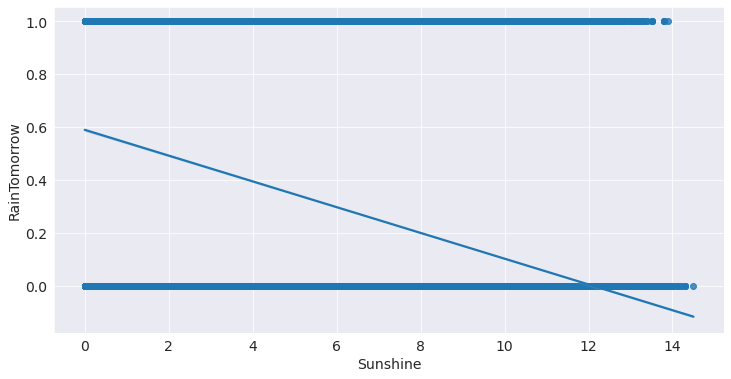

In [45]:
sns.regplot(x="Sunshine", y="RainTomorrow", data=df);

In [46]:
df[["Sunshine", "RainTomorrow"]].corr()

Sunshine  RainTomorrow
Sunshine      1.000000     -0.321533
RainTomorrow -0.321533      1.000000

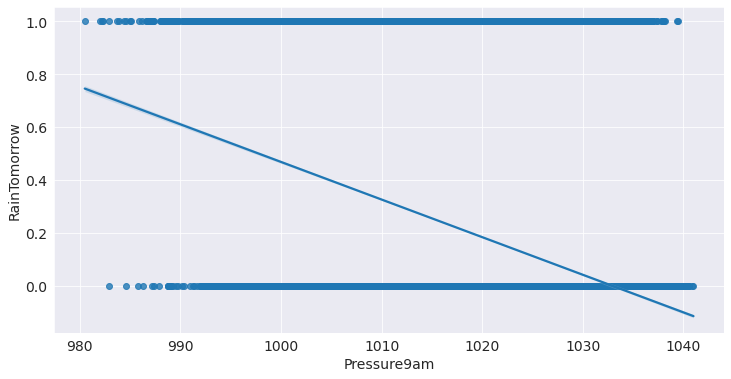

In [47]:
sns.regplot(x="Pressure9am", y="RainTomorrow", data=df);

In [48]:
df[["Pressure9am", "RainTomorrow"]].corr()

Pressure9am  RainTomorrow
Pressure9am      1.000000     -0.230975
RainTomorrow    -0.230975      1.000000

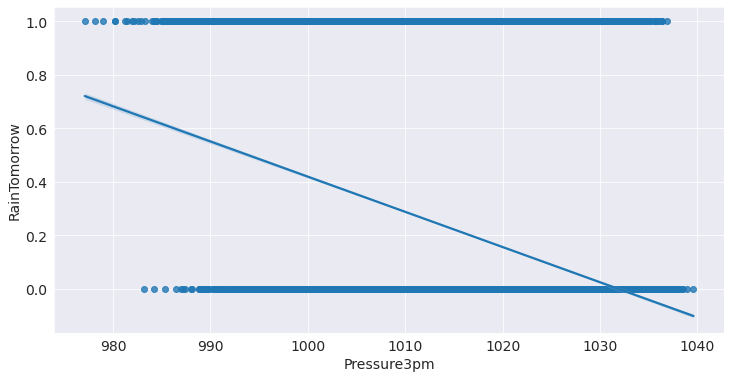

In [49]:
sns.regplot(x="Pressure3pm", y="RainTomorrow", data=df);

In [50]:
df[["Pressure3pm", "RainTomorrow"]].corr()

Pressure3pm  RainTomorrow
Pressure3pm      1.000000     -0.211977
RainTomorrow    -0.211977      1.000000

In [51]:
cols = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
                    'Sunshine', 'Pressure9am', 'Pressure3pm']

for col in cols: 
    pearson_coef, p_value = stats.pearsonr(df[col], df['RainTomorrow'])
    print("The PearsonR between {} and RainTomorrow is {} with a P-value of P = {}".format(col, pearson_coef, p_value))
    if p_value < 0.001:
        print('Correlation between {} and RainTomorrow is statistically significant..'.format(col))
    elif p_value < 0.05:
        print('Correlation between {} and RainTomorrow is statistically moderate..'.format(col))
    elif p_value < 0.1:
        print('Correlation between {} and RainTomorrow is statistically weak..'.format(col))
    else:
        print('Correlation between {} and RainTomorrow is statistically not significant..'.format(col))

    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print('Coeff ~{} shows that the relationship is positive and very strong.\n'.format(pearson_coef))
        elif pearson_coef > 0.75 :
            print('Coeff ~{} shows that the relationship is positive and quite strong.\n'.format(pearson_coef))
        elif pearson_coef > 0.60:
            print('Coeff ~{} shows that the relationship is positive and moderately strong.\n'.format(pearson_coef))
        elif pearson_coef > 0.50 :
            print('Coeff ~{} shows that the relationship is positive and only moderate.\n'.format(pearson_coef))
        else:
            print('Coefficient ~{} shows that the relationship is positive and weak.\n'.format(pearson_coef))
    else:
        if abs(pearson_coef) > 0.85:
            print('Coeff ~{} shows that the relationship is negative and very strong.\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.75 :
            print('Coeff ~{} shows that the relationship is negative and quite strong.\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.60:
            print('Coeff ~{} shows that the relationship is negative and moderately strong.\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.50 :
            print('Coeff ~{} shows that the relationship is negative and only moderate.\n'.format(pearson_coef))
        else:
            print('Coefficient ~{} shows that the relationship is negative and weak.\n'.format(pearson_coef))

The PearsonR between Rainfall and RainTomorrow is 0.23389975766397209 with a P-value of P = 0.0
Correlation between Rainfall and RainTomorrow is statistically significant..
Coefficient ~0.23389975766397209 shows that the relationship is positive and weak.

The PearsonR between WindGustSpeed and RainTomorrow is 0.22044199843563794 with a P-value of P = 0.0
Correlation between WindGustSpeed and RainTomorrow is statistically significant..
Coefficient ~0.22044199843563794 shows that the relationship is positive and weak.

The PearsonR between Humidity9am and RainTomorrow is 0.2514695378307264 with a P-value of P = 0.0
Correlation between Humidity9am and RainTomorrow is statistically significant..
Coefficient ~0.2514695378307264 shows that the relationship is positive and weak.

The PearsonR between Humidity3pm and RainTomorrow is 0.4331793106264611 with a P-value of P = 0.0
Correlation between Humidity3pm and RainTomorrow is statistically significant..
Coefficient ~0.4331793106264611 shows

In [52]:
Important_columns = ['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
                    'Sunshine', 'Pressure9am', 'Pressure3pm']

In [53]:
rain_df = df[df['RainTomorrow'] == 1]
no_rain_df = df[df['RainTomorrow'] == 0]

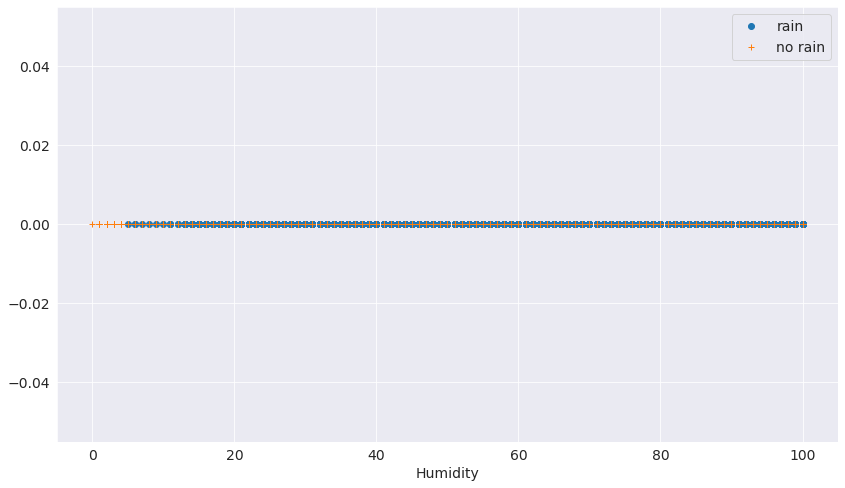

In [54]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Humidity9am'], np.zeros_like(rain_df['Humidity9am']), 'o', label='rain')
plt.plot(no_rain_df['Humidity9am'], np.zeros_like(no_rain_df['Humidity9am']), '+', label='no rain')
plt.xlabel("Humidity")
plt.legend();

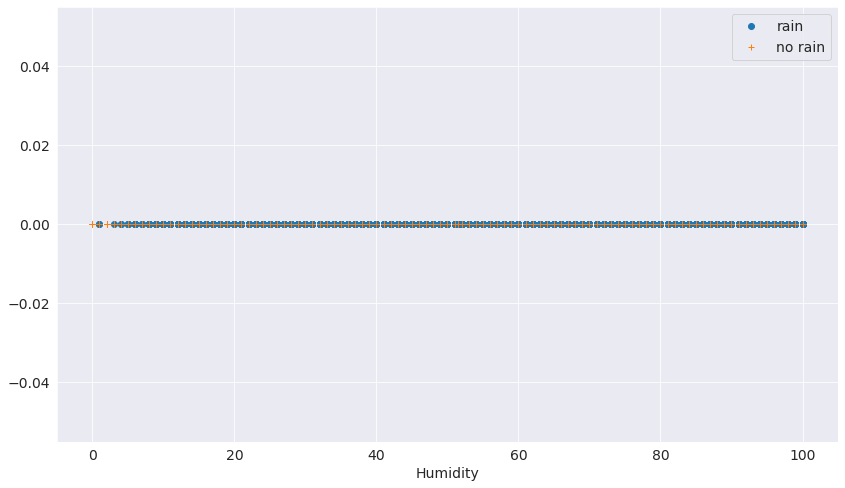

In [55]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Humidity3pm'], np.zeros_like(rain_df['Humidity3pm']), 'o', label='rain')
plt.plot(no_rain_df['Humidity3pm'], np.zeros_like(no_rain_df['Humidity3pm']), '+', label='no rain')
plt.xlabel("Humidity")
plt.legend();

In [56]:
df['Cloud9am'].unique()

array([8.      , 4.447461, 7.      , 1.      , 0.      , 5.      ,
       4.      , 2.      , 6.      , 3.      , 9.      ], dtype=float32)

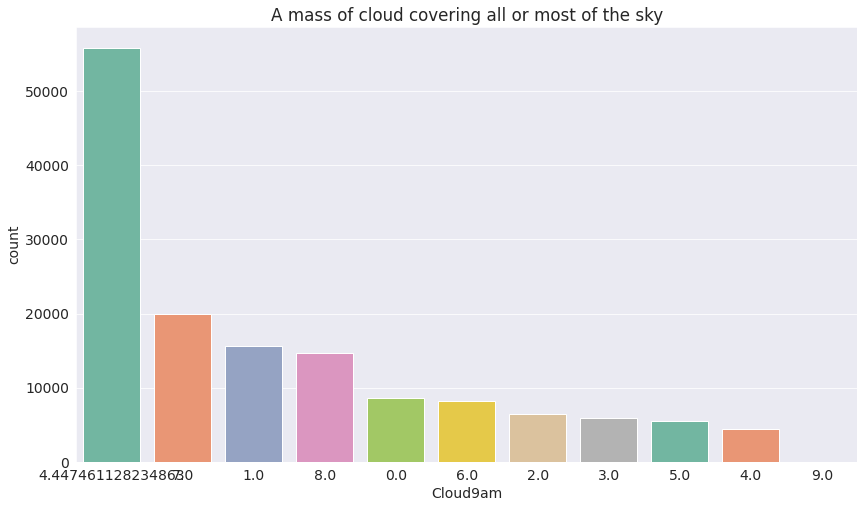

In [57]:
plt.figure(figsize=(14, 8))
plt.xlabel("Cloud9am")
plt.ylabel("Count")
plt.title("A mass of cloud covering all or most of the sky")
ax = sns.countplot(x=df['Cloud9am'],
                   order=df['Cloud9am'].value_counts(ascending=False).index, palette = "Set2");

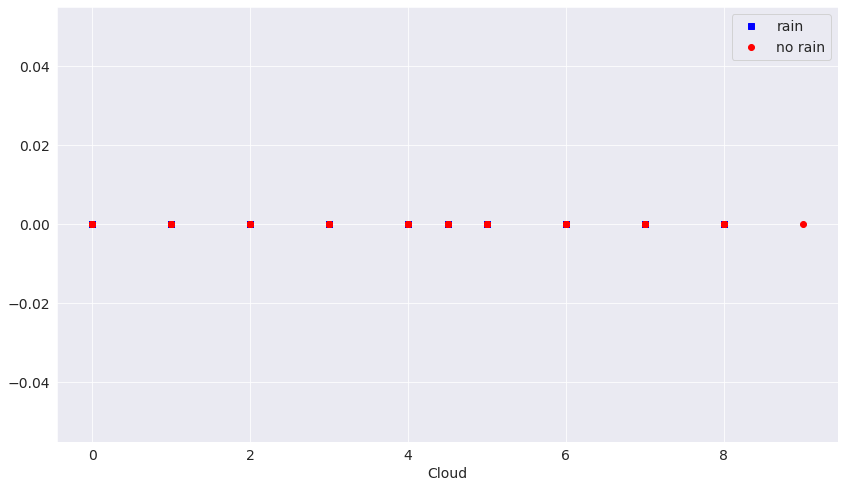

In [58]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Cloud3pm'], np.zeros_like(rain_df['Cloud3pm']), 'sb', label='rain')
plt.plot(no_rain_df['Cloud3pm'], np.zeros_like(no_rain_df['Cloud3pm']), 'or', label='no rain')
plt.xlabel("Cloud")
plt.legend();

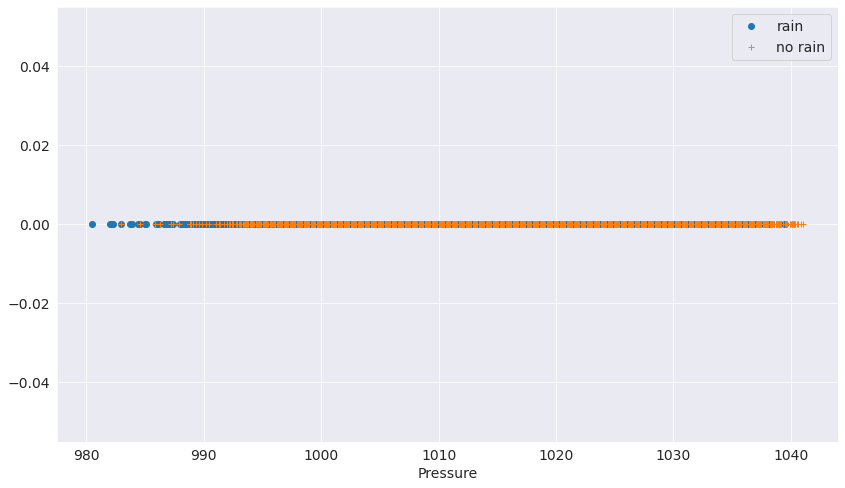

In [59]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Pressure9am'], np.zeros_like(rain_df['Pressure9am']), 'o', label='rain')
plt.plot(no_rain_df['Pressure9am'], np.zeros_like(no_rain_df['Pressure9am']), '+', label='no rain')
plt.xlabel("Pressure")
plt.legend();

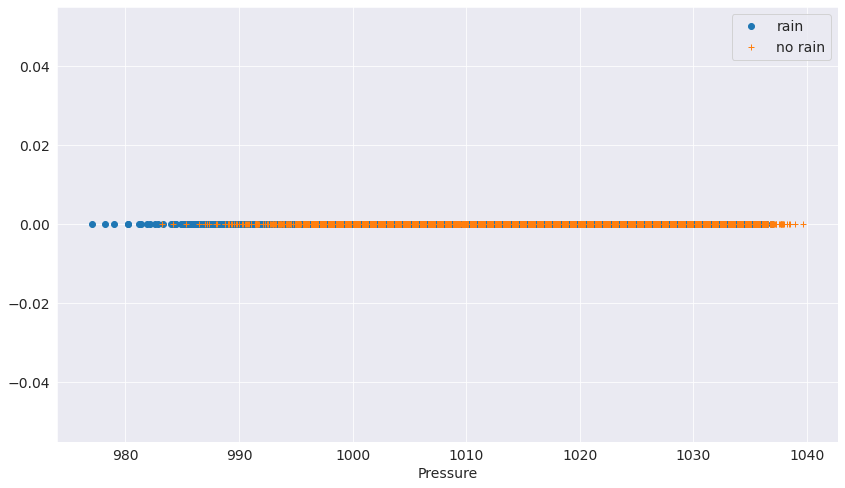

In [60]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Pressure3pm'], np.zeros_like(rain_df['Pressure3pm']), 'o', label='rain')
plt.plot(no_rain_df['Pressure3pm'], np.zeros_like(no_rain_df['Pressure3pm']), '+', label='no rain')
plt.xlabel("Pressure")
plt.legend();

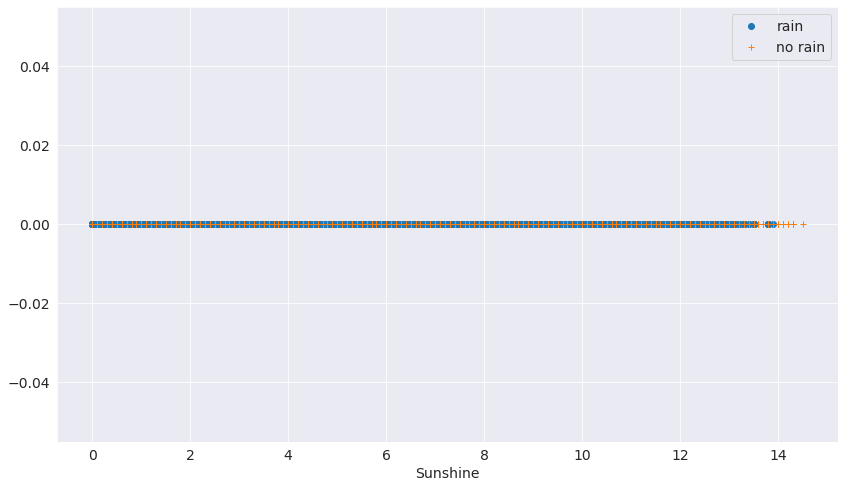

In [62]:
plt.figure(figsize=(14, 8))
plt.plot(rain_df['Sunshine'], np.zeros_like(rain_df['Sunshine']), 'o', label='rain')
plt.plot(no_rain_df['Sunshine'], np.zeros_like(no_rain_df['Sunshine']), '+', label='no rain')
plt.xlabel("Sunshine")
plt.legend();

In [63]:
def Histogram(column):
    plt.figure(figsize=(14, 8))
    plt.xlabel("Distrubution")
    plt.ylabel("Count")
    plt.title("The Histogram of {}".format(column))
    plt.hist(df[column], rwidth=0.95, bins=10)
    plt.show();


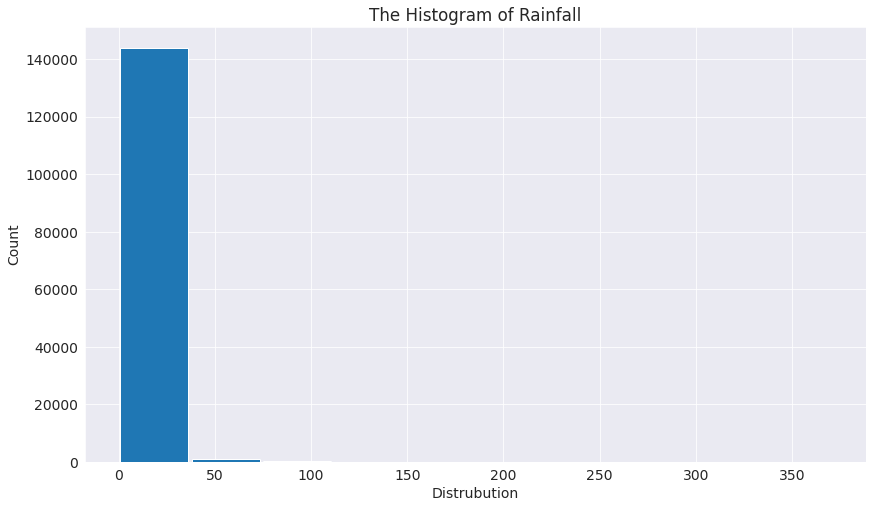

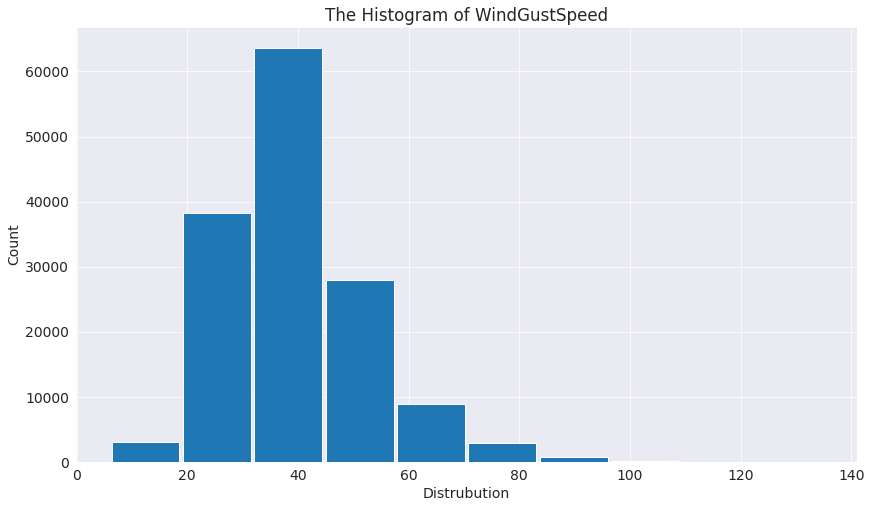

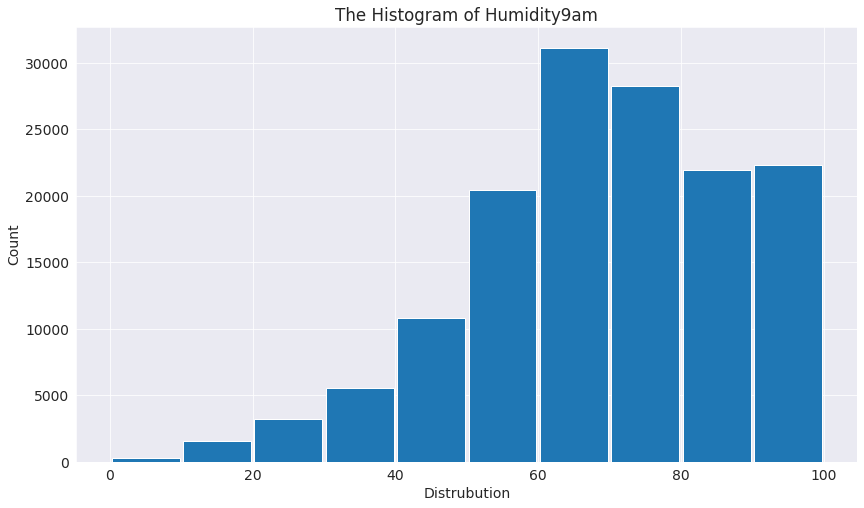

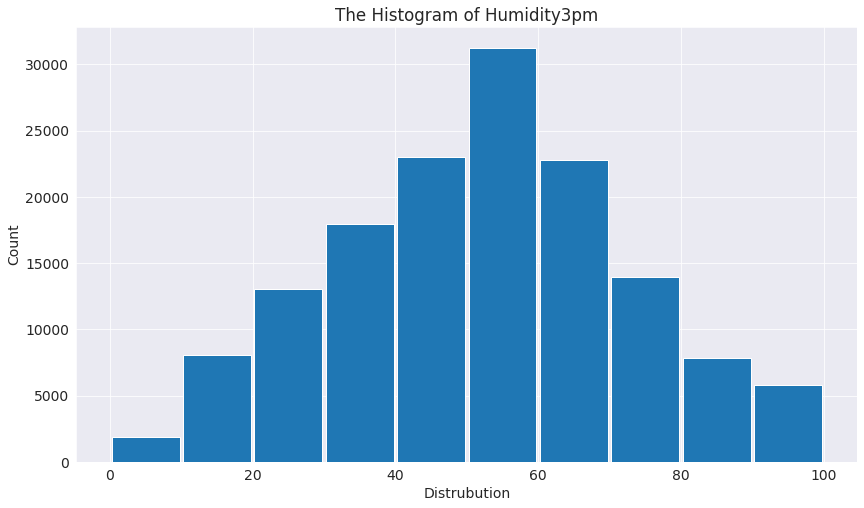

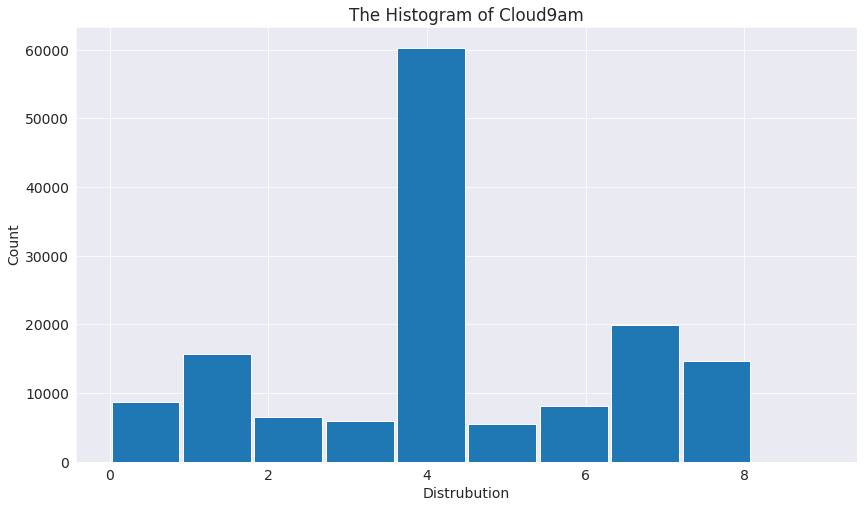

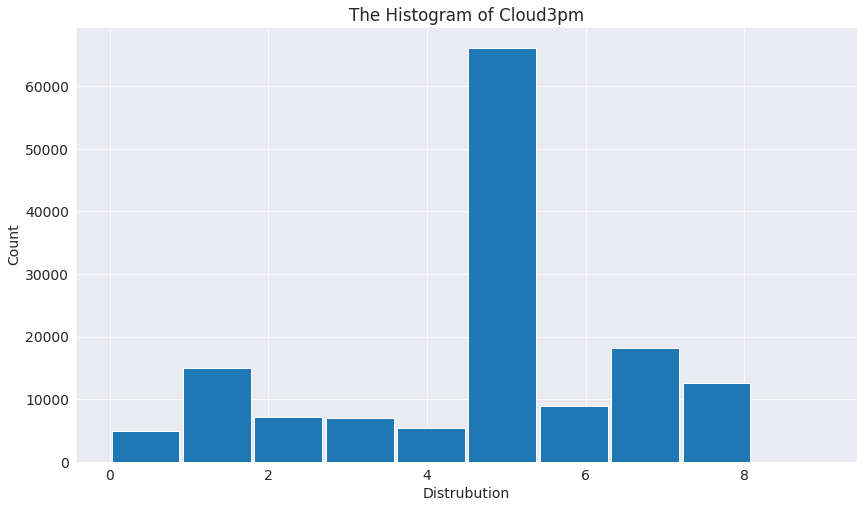

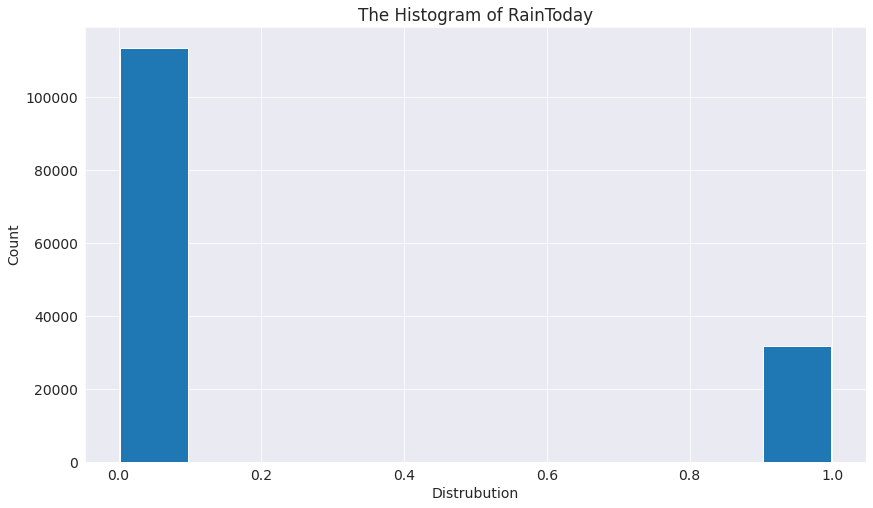

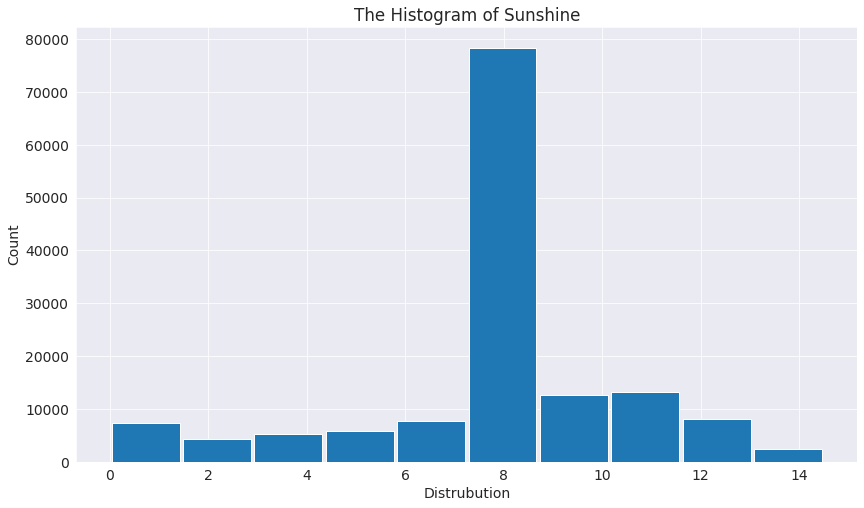

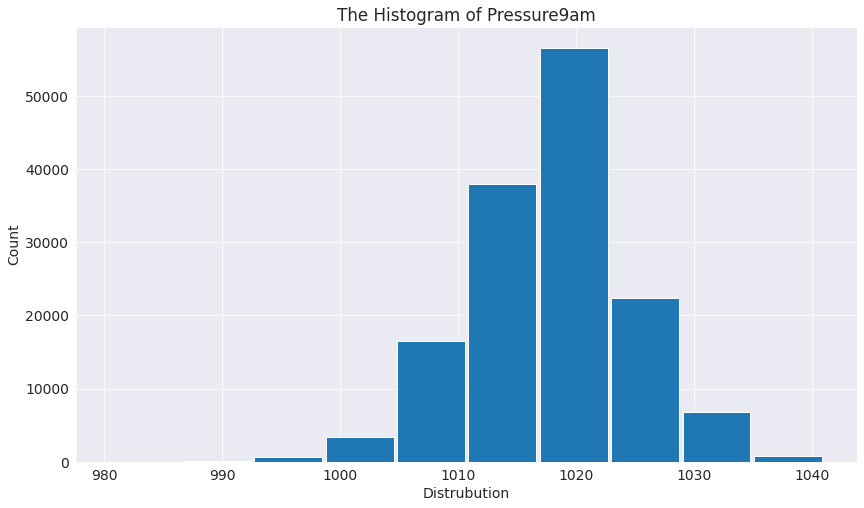

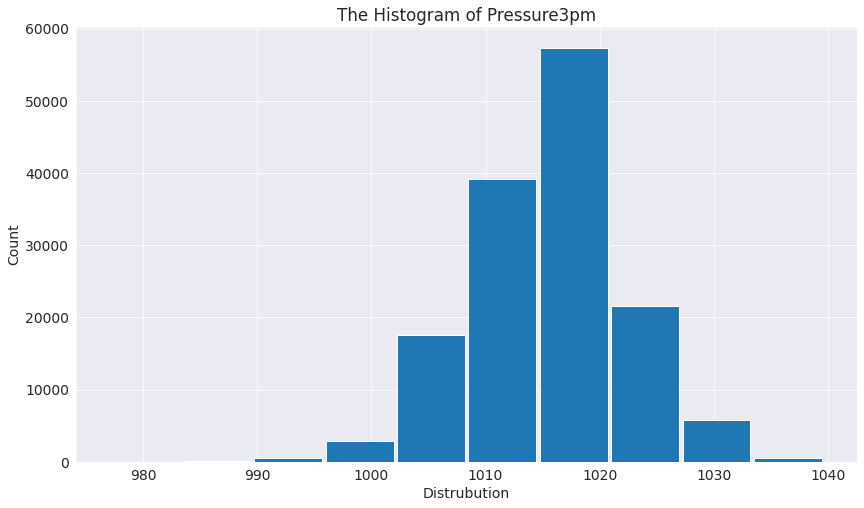

In [64]:
for column in Important_columns:
    Histogram(column)

In [65]:
def DistrubutionPlot(column):
    plt.figure(figsize=(14, 8))
    plt.xlabel("Distrubution")
    plt.ylabel("Probability")
    plt.title("The Histogram of {}".format(column))
    sns.distplot(df[column])
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


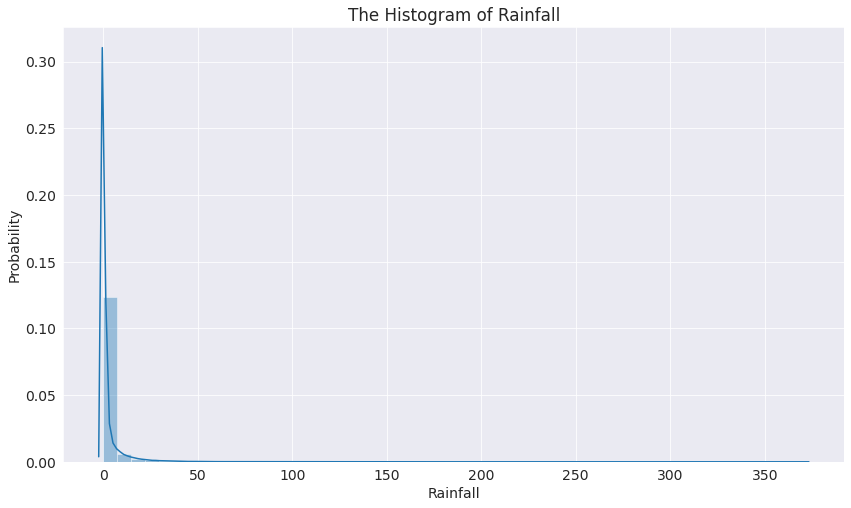

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


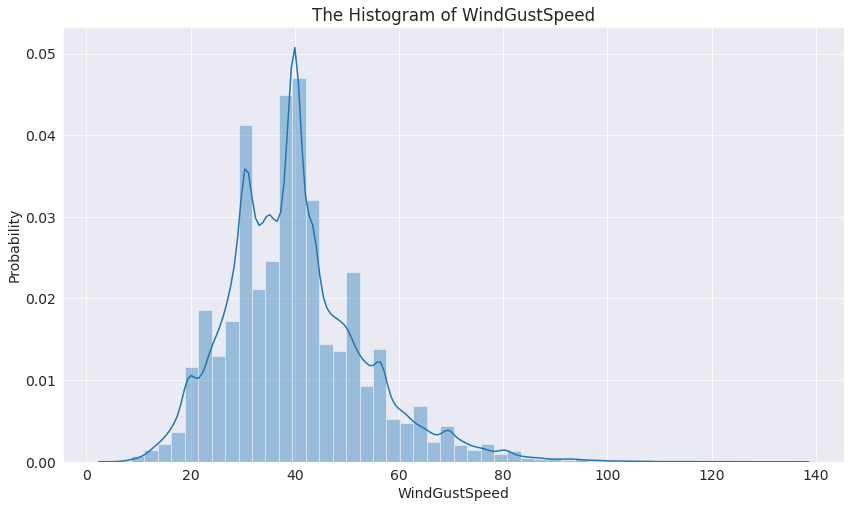

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


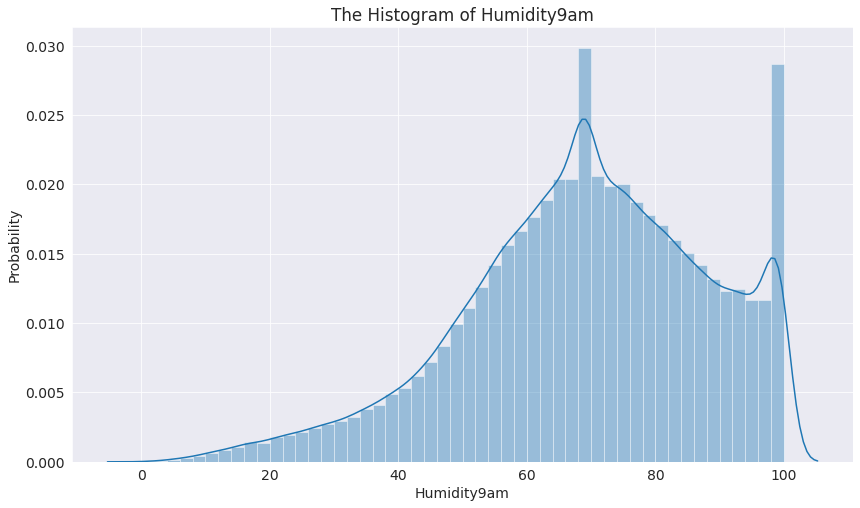

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


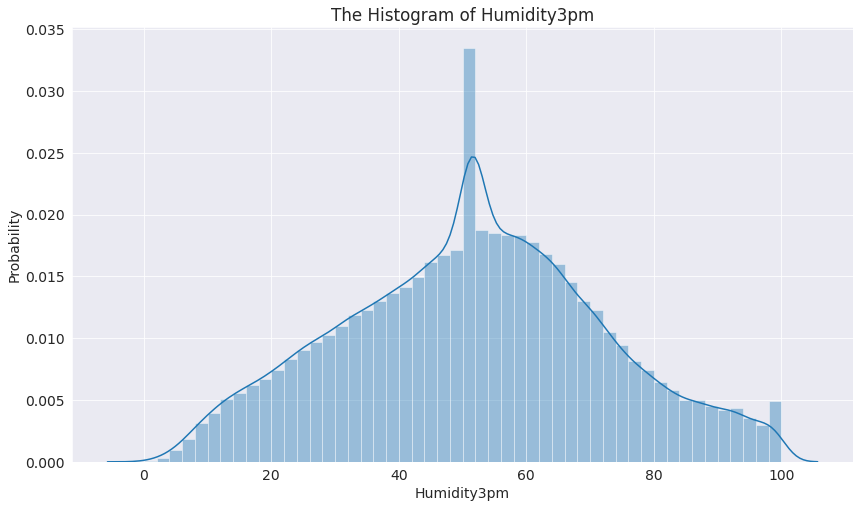

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


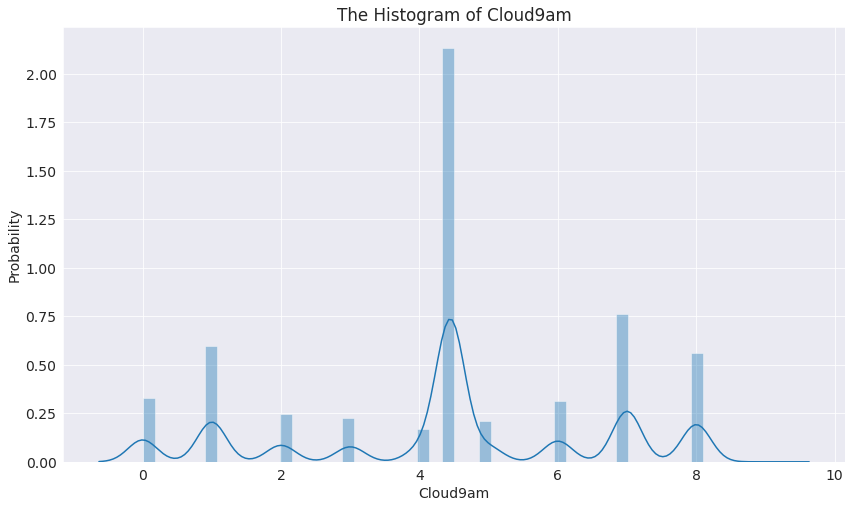

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


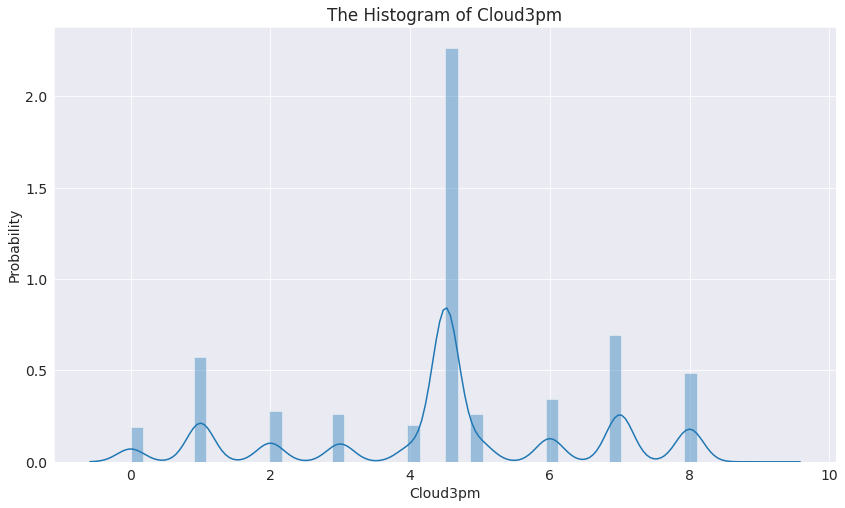

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


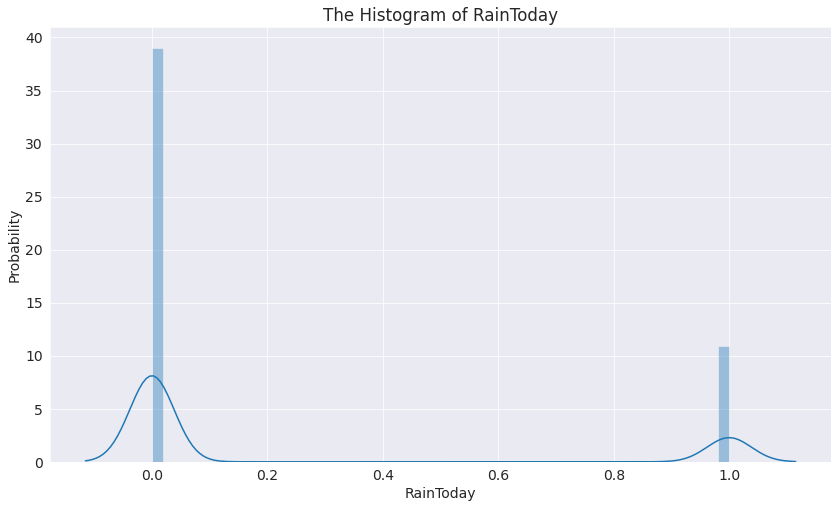

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


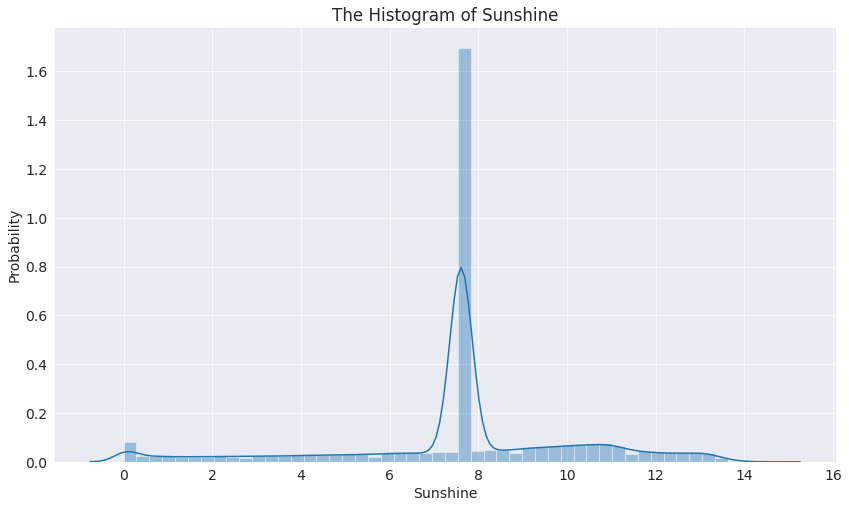

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


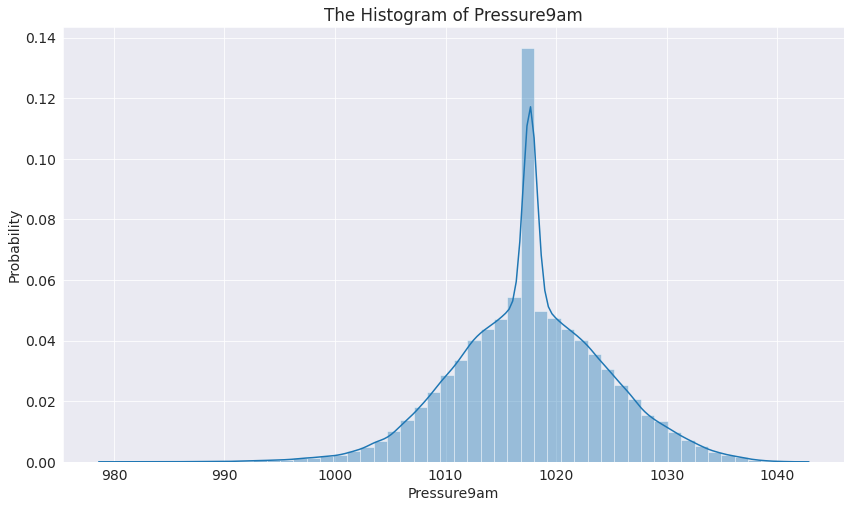

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


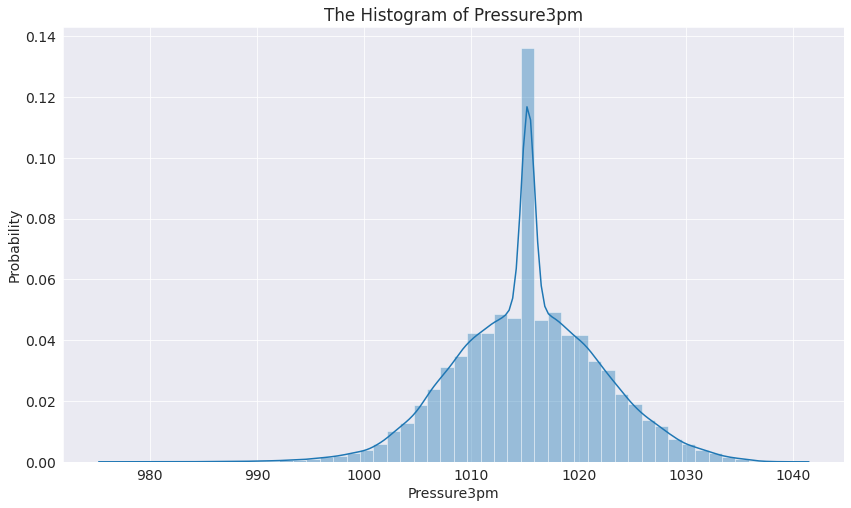

In [66]:
for column in Important_columns:
    DistrubutionPlot(column)

In [67]:
def Boxplot(column):
    plt.figure(figsize=(16, 5))
    plt.title("The Box plot of {}".format(column))
    sns.boxplot(df[column])
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


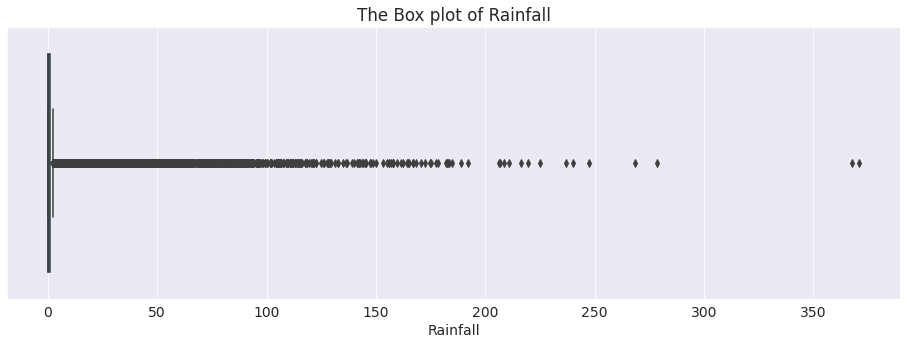

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


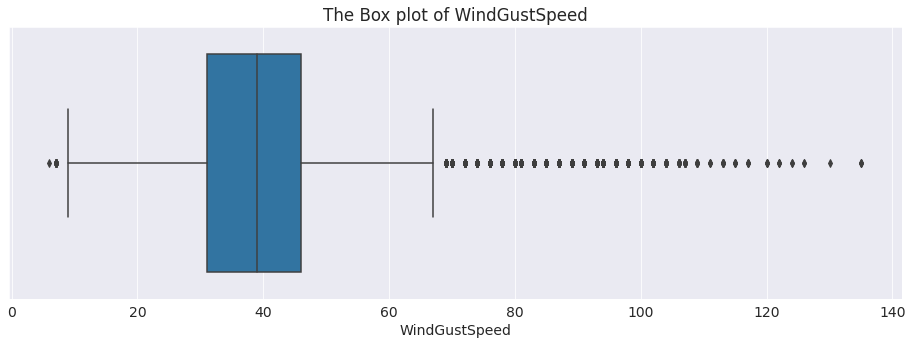

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


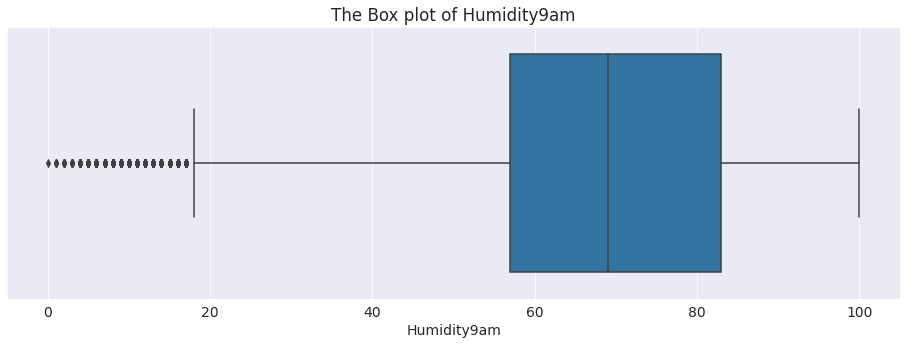

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


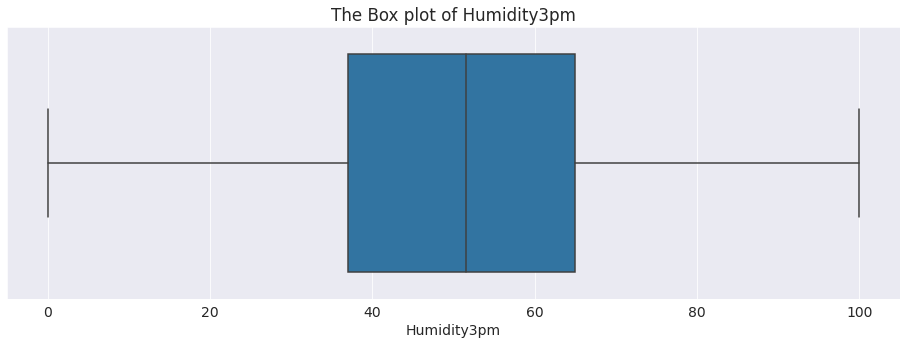

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


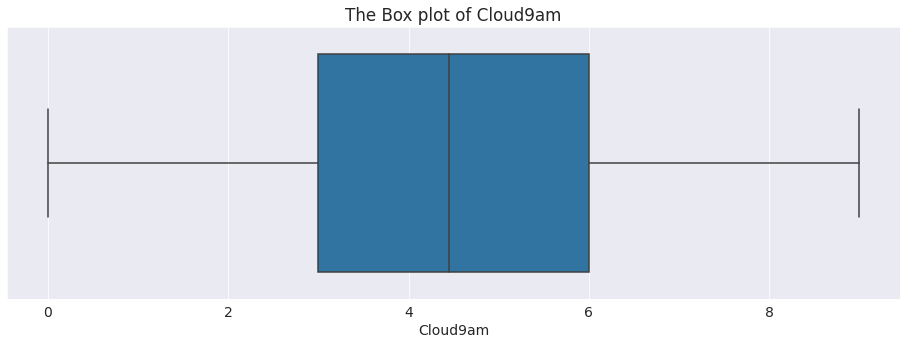

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


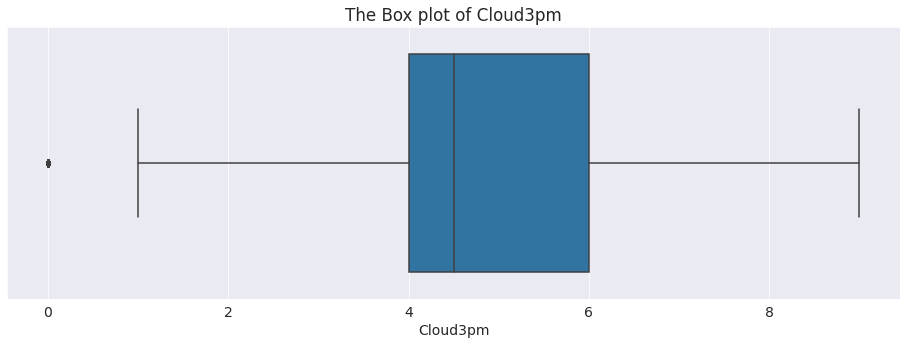

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


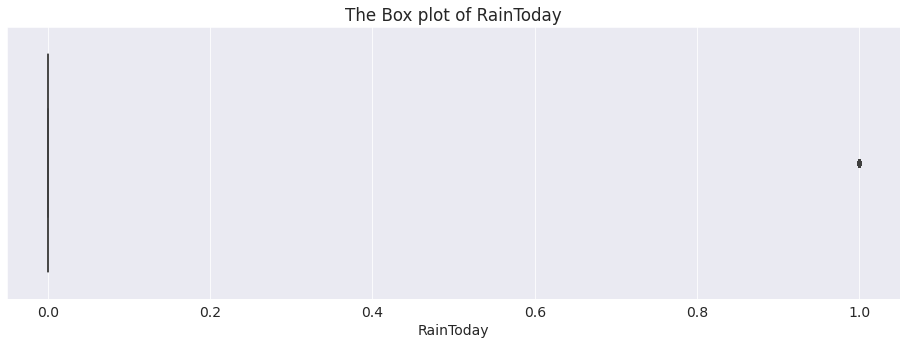

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


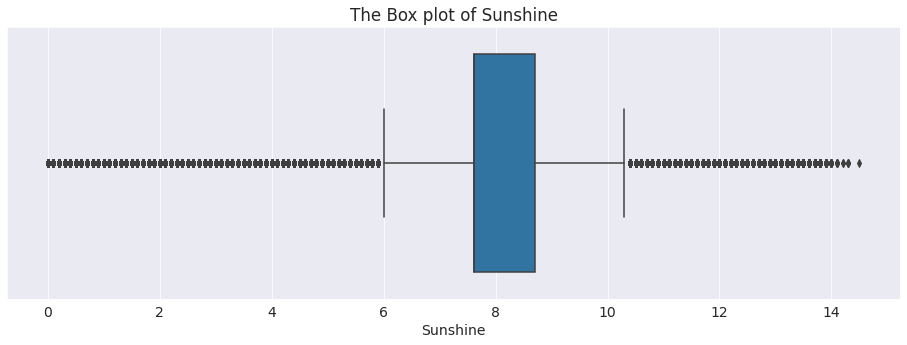

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


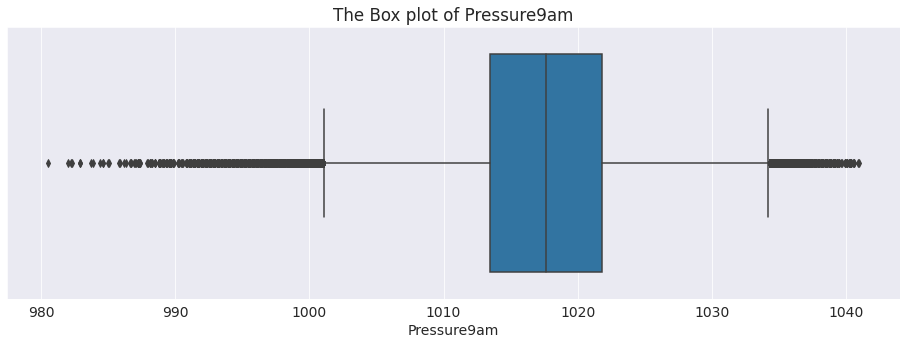

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


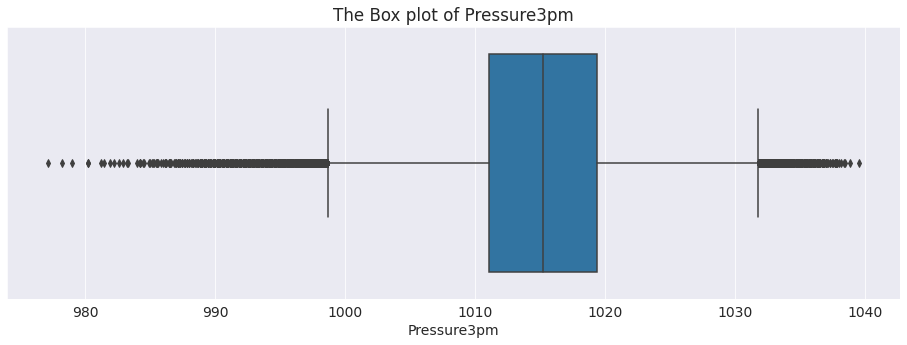

In [68]:
for column in Important_columns:
    Boxplot(column)

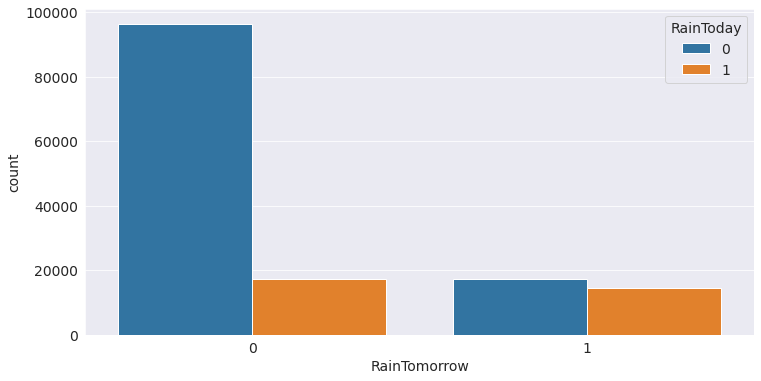

In [69]:
sns.countplot(x ='RainTomorrow', hue = "RainToday", data = df)
plt.show()

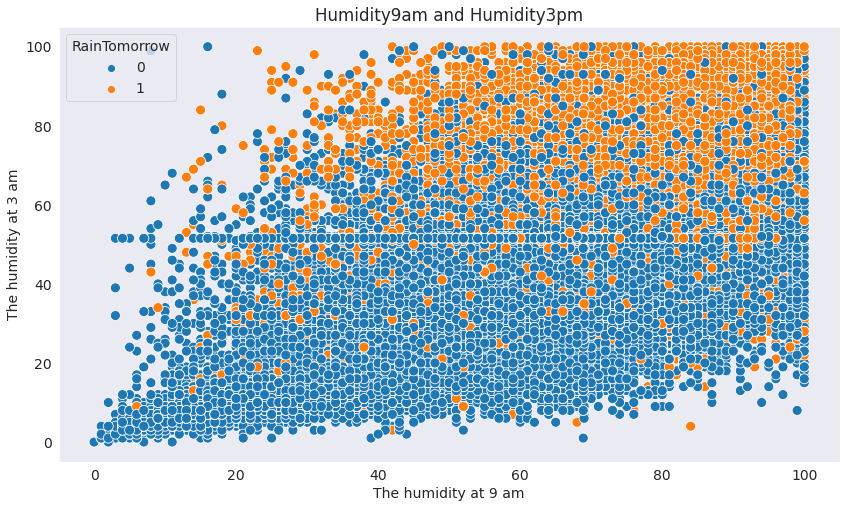

In [70]:
plt.figure(figsize=(14, 8))
plt.xlabel("The humidity at 9 am")
plt.ylabel("The humidity at 3 am")
plt.title("Humidity9am and Humidity3pm")
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=df, s=100, hue='RainTomorrow')
plt.grid();

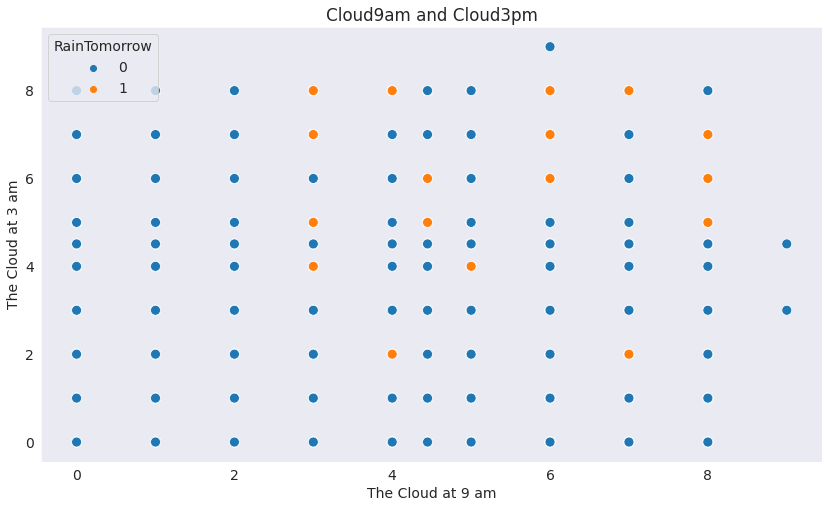

In [71]:
plt.figure(figsize=(14, 8))
plt.xlabel("The Cloud at 9 am")
plt.ylabel("The Cloud at 3 am")
plt.title("Cloud9am and Cloud3pm")
sns.scatterplot(x='Cloud9am', y='Cloud3pm', data=df, s=100, hue='RainTomorrow')
plt.grid();

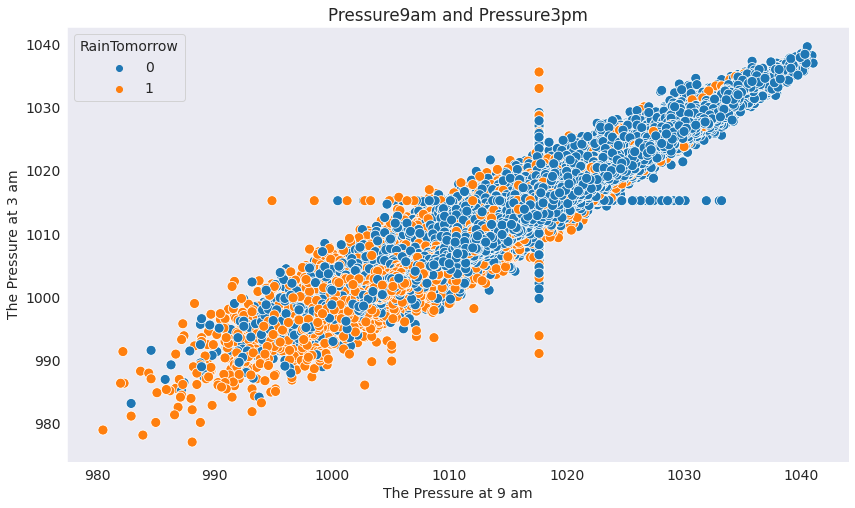

In [72]:
plt.figure(figsize=(14, 8))
plt.xlabel("The Pressure at 9 am")
plt.ylabel("The Pressure at 3 am")
plt.title("Pressure9am and Pressure3pm")
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=df, s=100, hue='RainTomorrow')
plt.grid();

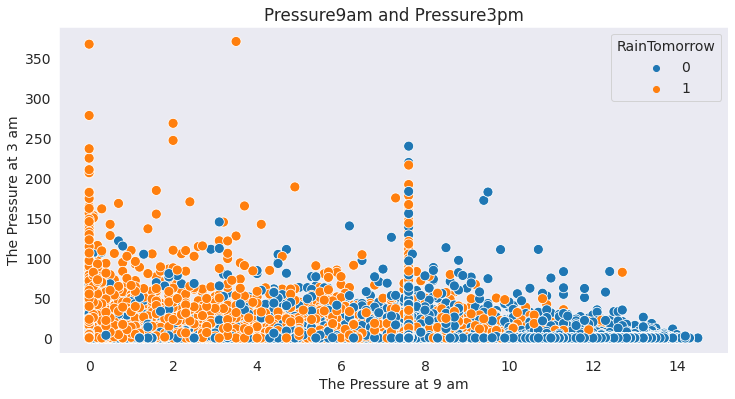

In [73]:
plt.xlabel("The Pressure at 9 am")
plt.ylabel("The Pressure at 3 am")
plt.title("Pressure9am and Pressure3pm")
sns.scatterplot(x='Sunshine', y='Rainfall', data=df, s=100, hue='RainTomorrow')
plt.grid();

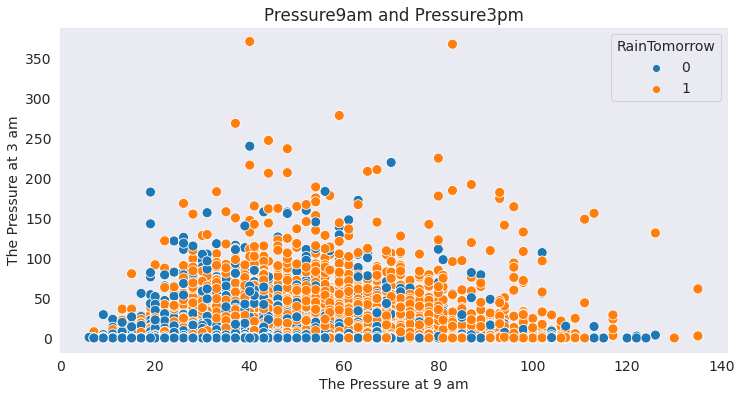

In [74]:
plt.xlabel("The Pressure at 9 am")
plt.ylabel("The Pressure at 3 am")
plt.title("Pressure9am and Pressure3pm")
sns.scatterplot(x='WindGustSpeed', y='Rainfall', data=df, s=100, hue='RainTomorrow')
plt.grid();

In [75]:
city = df.groupby('Location')

In [76]:
def plot(data):
  result = city[data].mean().sort_values(ascending=False).head(15)
  plt.title("The {} at different city".format(data))
  plt.ylabel(data)
  result.plot(kind='bar')
  plt.show();


In [77]:
column_list = ['MinTemp', 'MaxTemp']

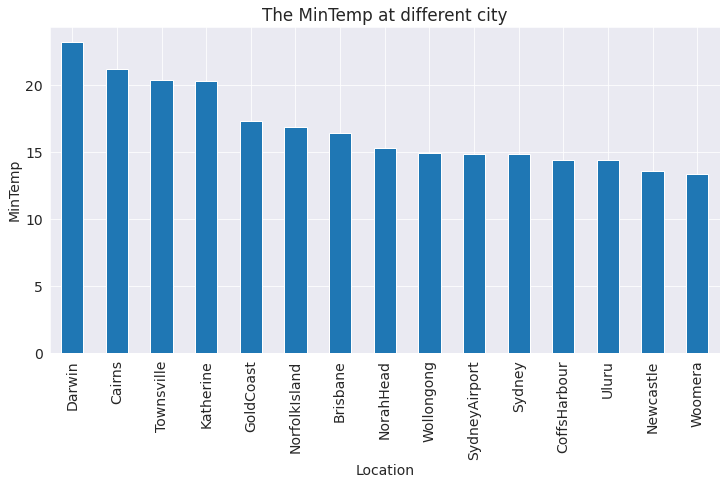

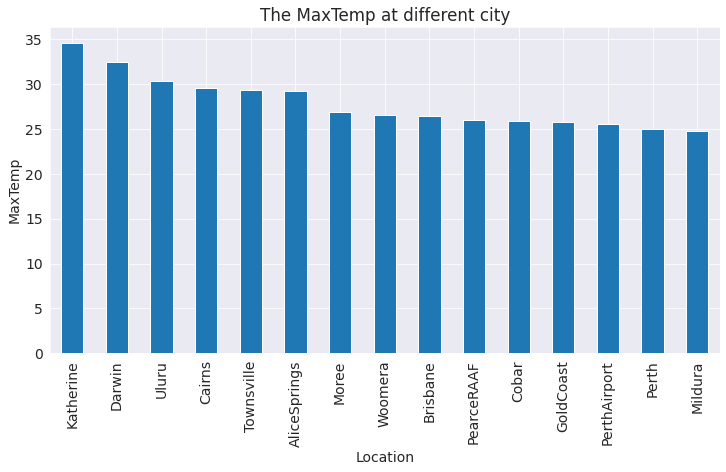

In [78]:
for column in column_list:
  plot(column)

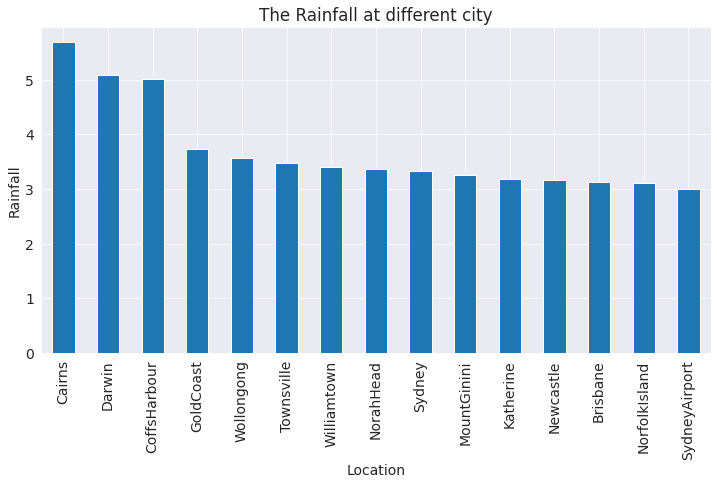

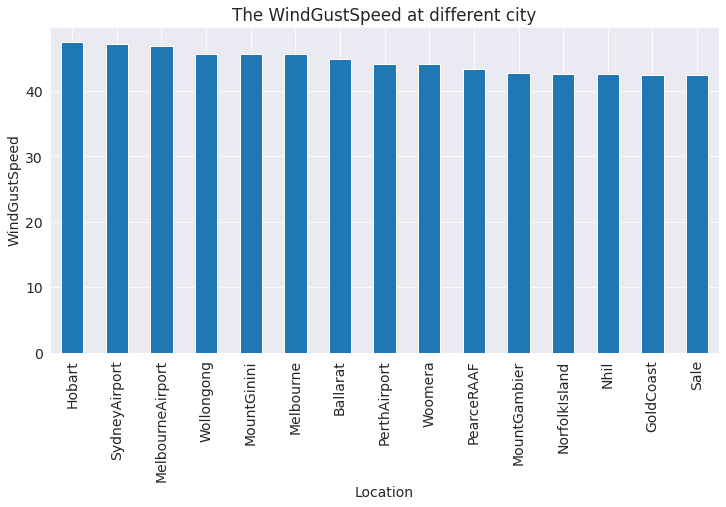

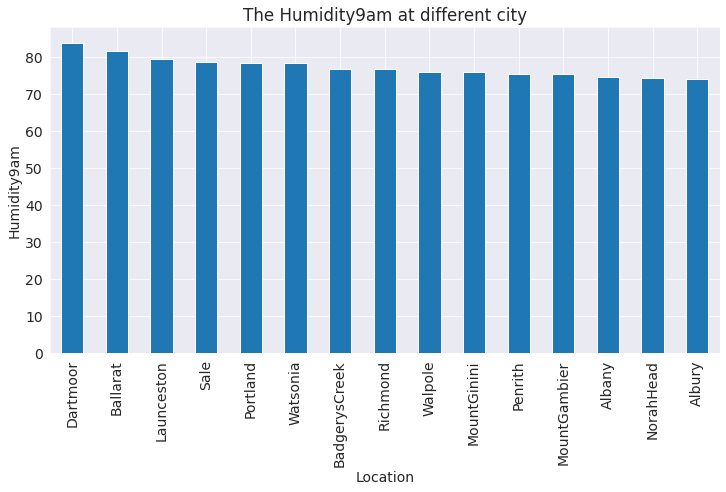

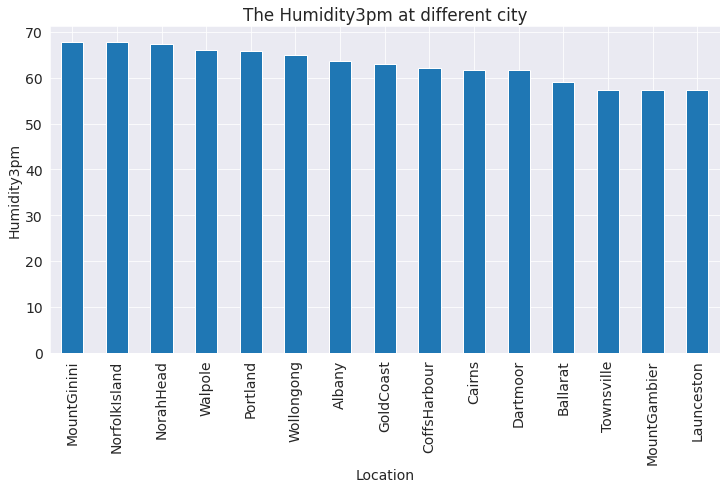

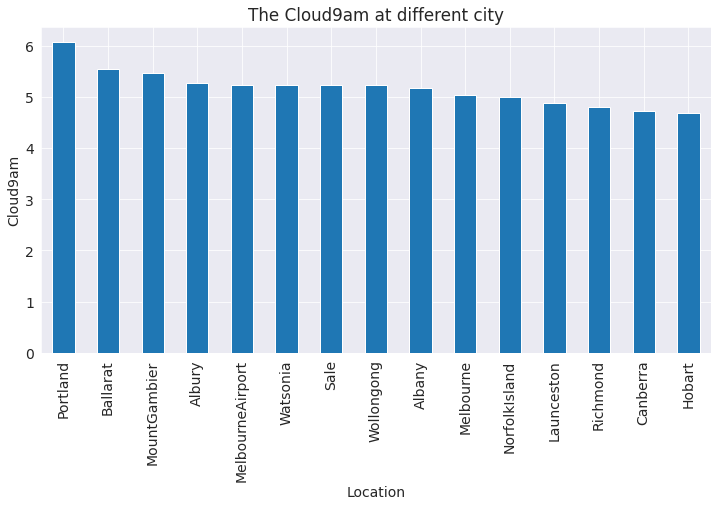

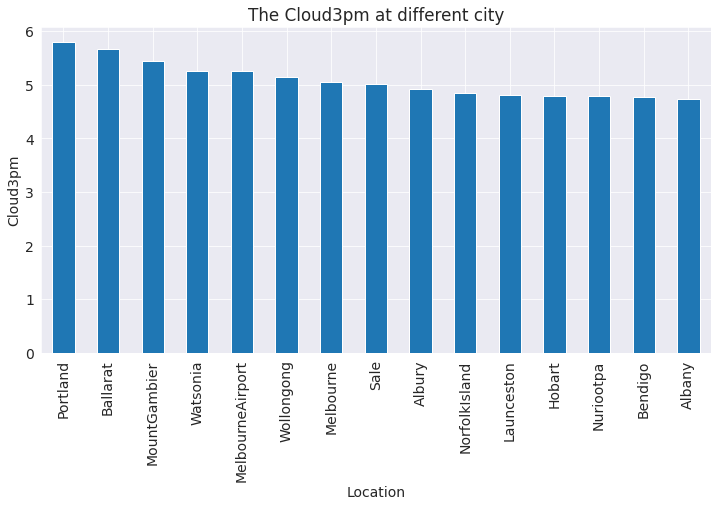

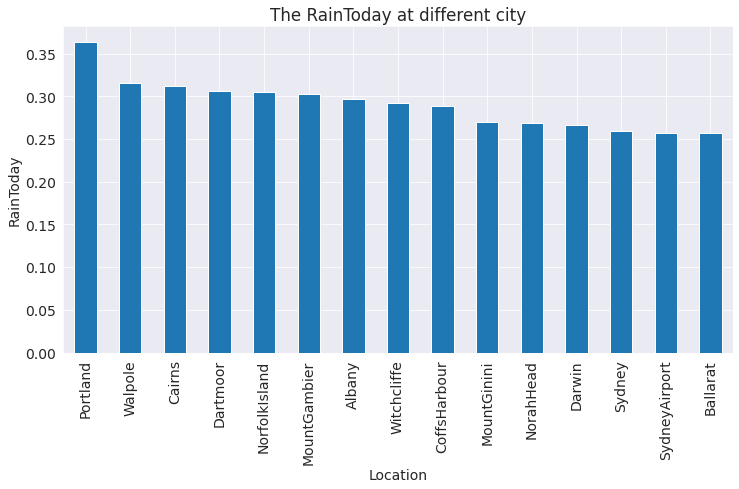

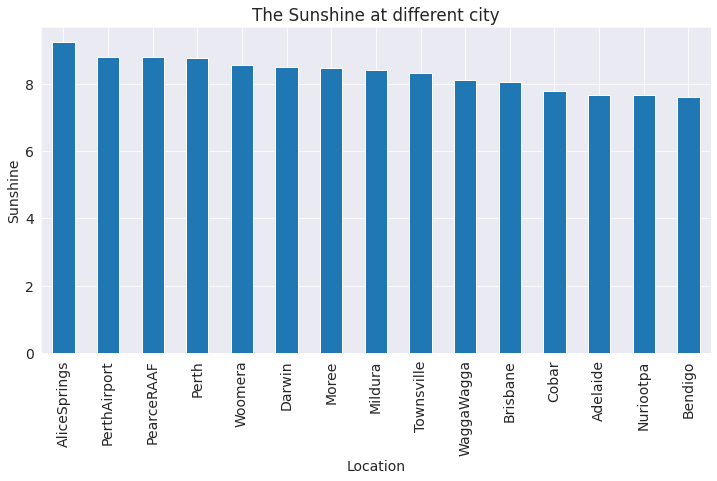

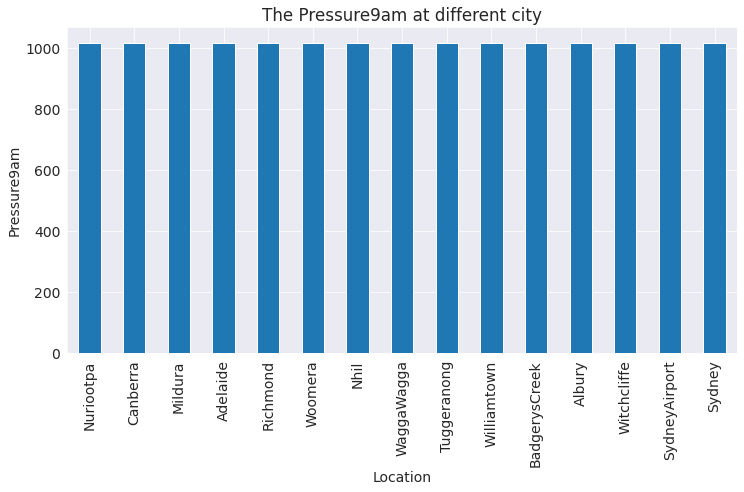

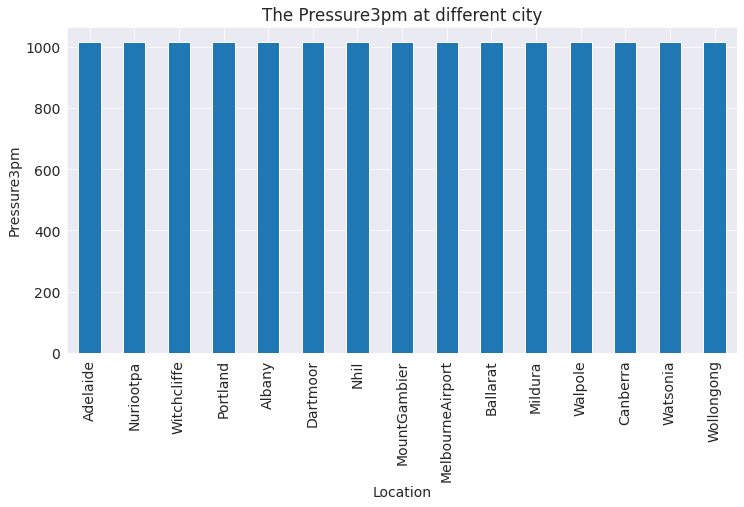

In [79]:
for column in Important_columns:
  plot(column)

In [80]:
city_maxtemperature = city['MaxTemp'].sum().sort_values(ascending=False).head(15)

In [81]:
min_tempcity = city['MinTemp'].sum().sort_values(ascending=False).head(15)

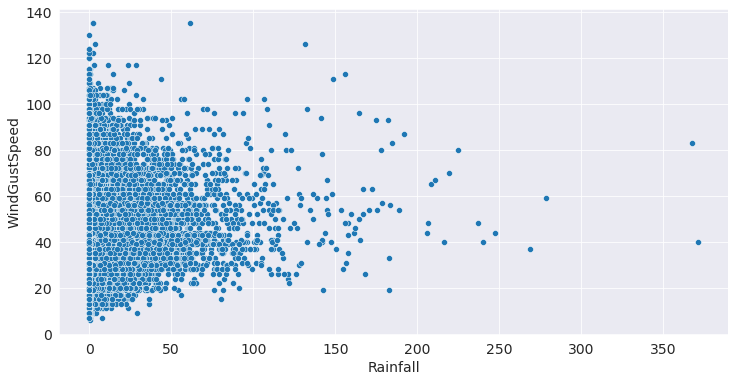

In [82]:
sns.scatterplot(x='Rainfall', y='WindGustSpeed', data=df);

In [83]:
rainfall_dataset = city[['Rainfall', 'WindGustSpeed']].mean().sort_values(by='Rainfall', ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


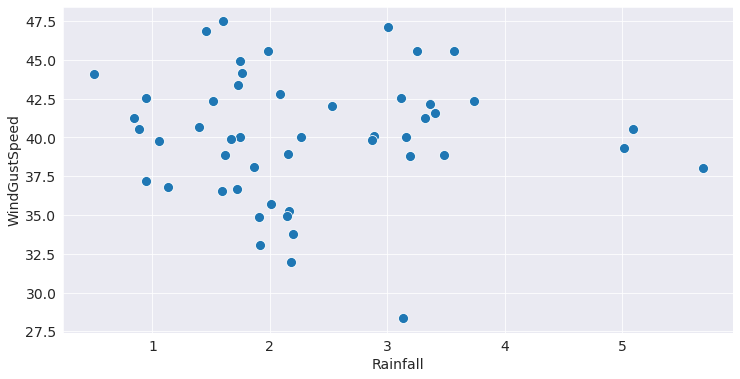

In [84]:
sns.scatterplot(rainfall_dataset['Rainfall'], rainfall_dataset['WindGustSpeed'], s=100);

In [85]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.dayofweek

In [86]:
year_data = df.groupby('Year')

In [87]:
def plot(data):
  plt.ylabel(data)
  plt.title("The {} at different years".format(data))
  result = year_data[data].mean()
  result.plot(kind='bar')
  plt.show()

In [88]:
column_list = ['MaxTemp', 'MinTemp']

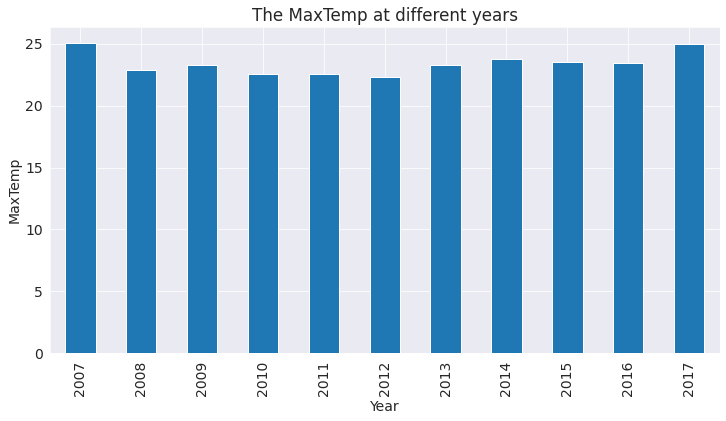

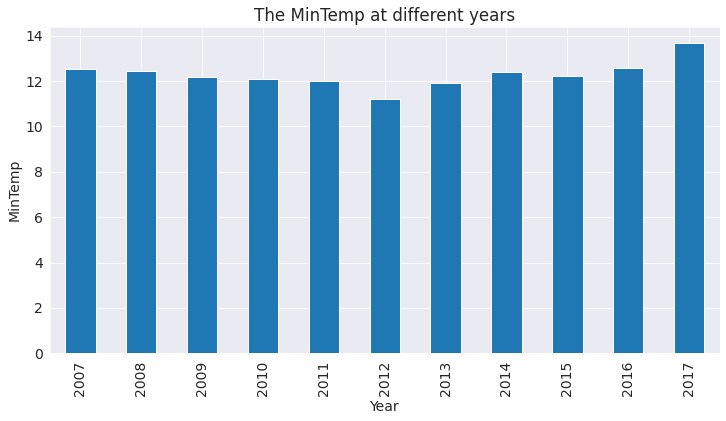

In [89]:
for column in column_list:
  plot(column)

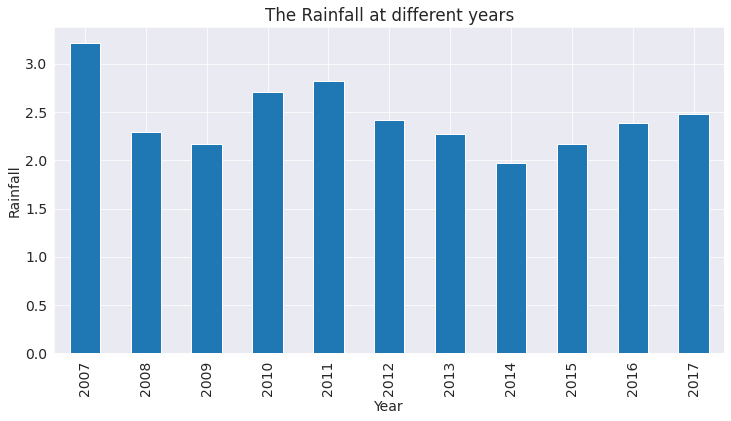

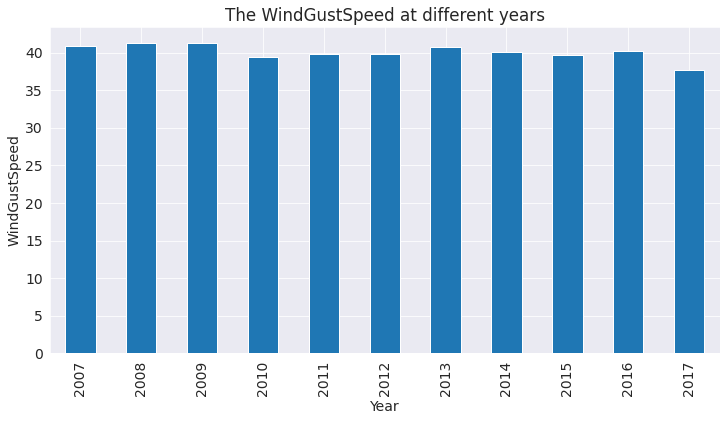

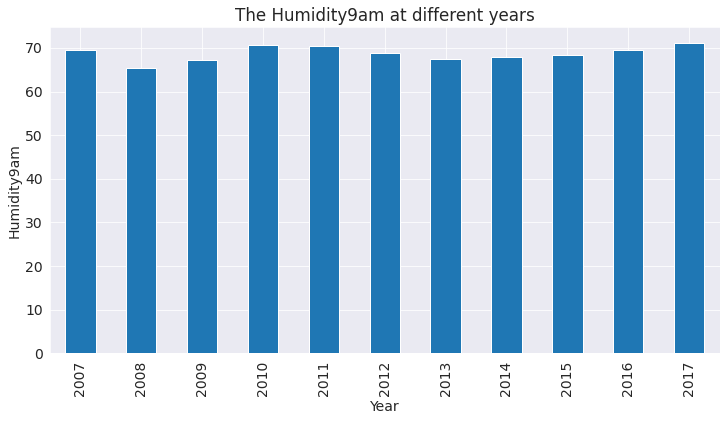

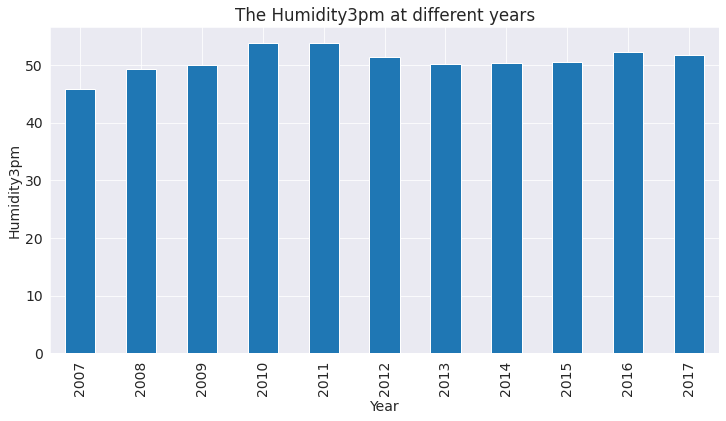

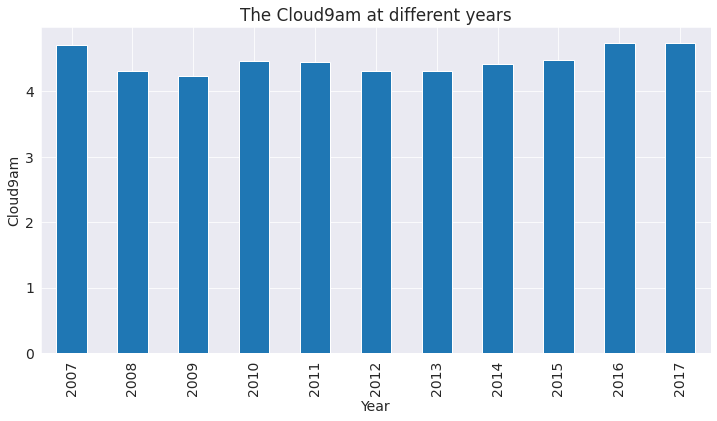

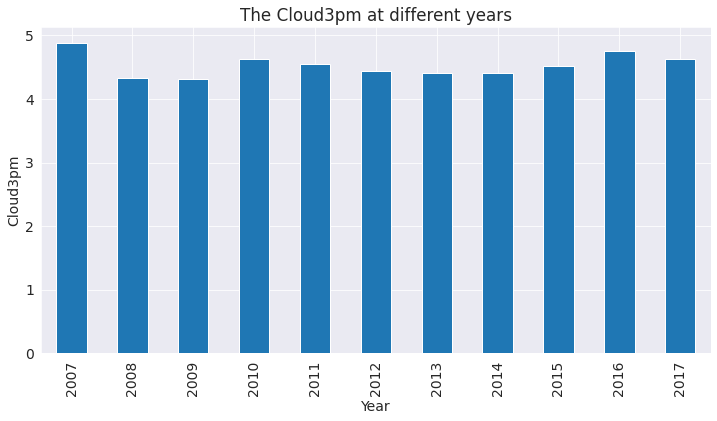

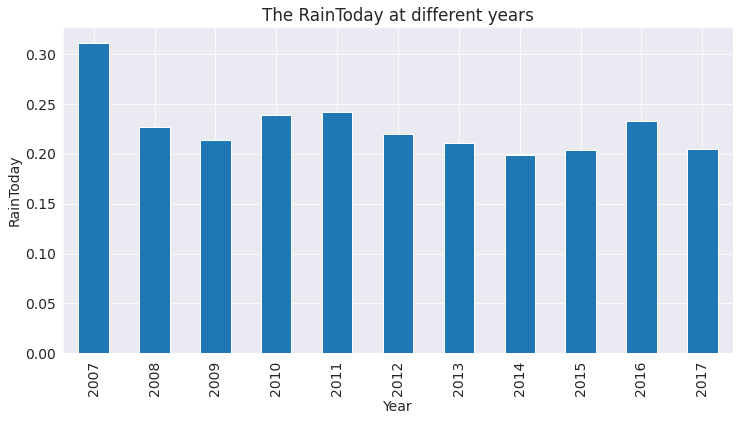

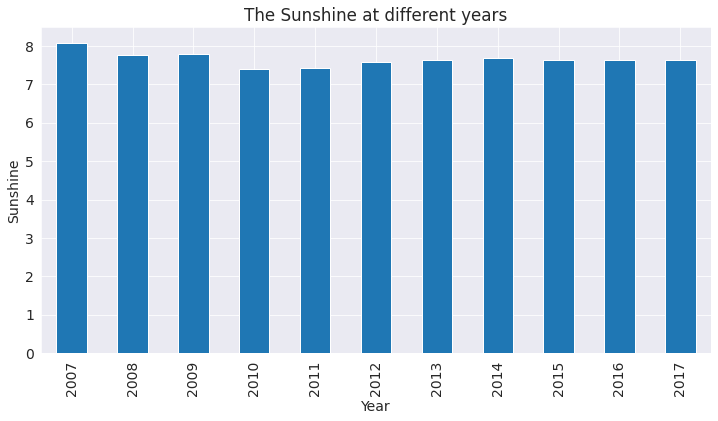

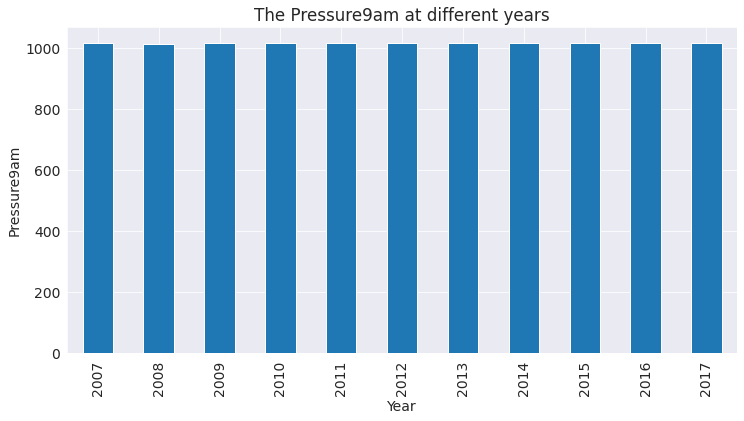

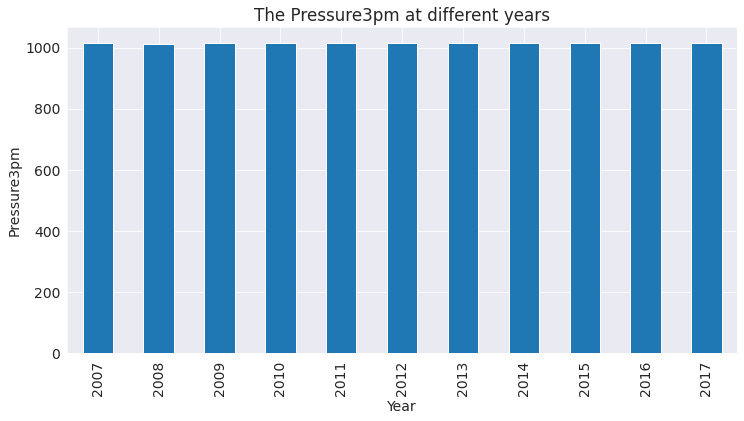

In [90]:
for column in Important_columns:
  plot(column)

In [91]:
month_data = df.groupby('Month')

In [92]:
def plot(data):
  plt.ylabel(data)
  plt.title("The {} at different month".format(data))
  result = month_data[data].mean()
  result.plot(kind='bar')
  plt.show()

In [93]:
column_list = ['MinTemp', 'MaxTemp']

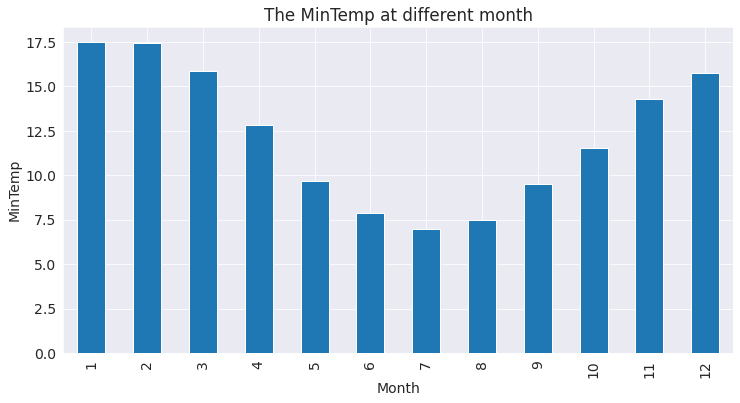

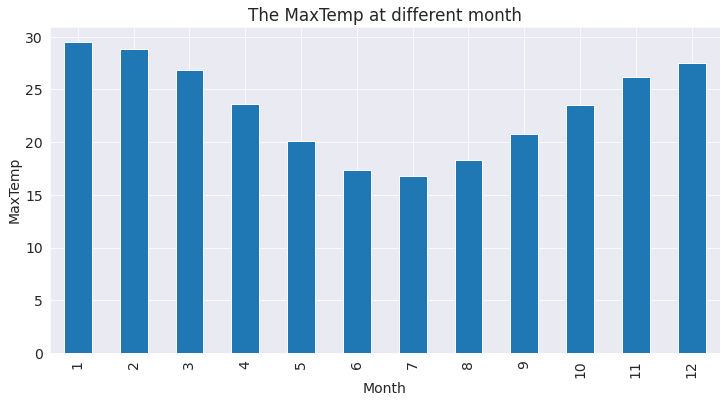

In [94]:
for column in column_list:
  plot(column)

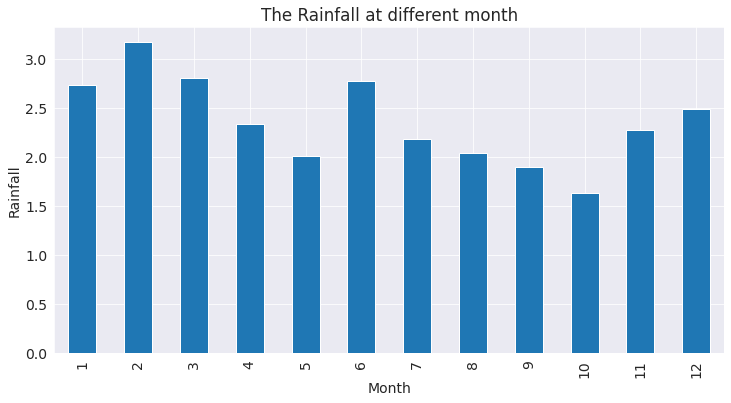

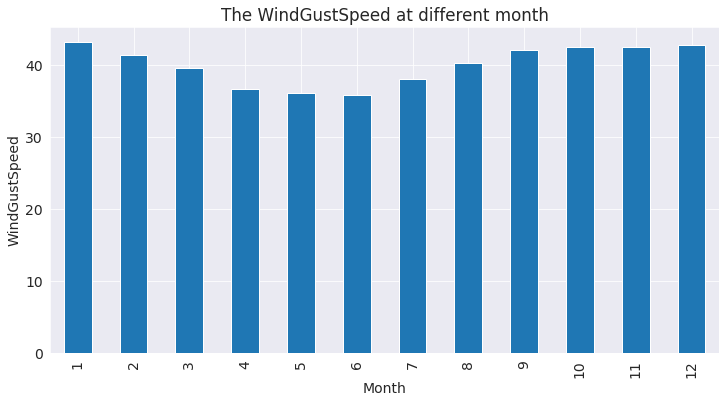

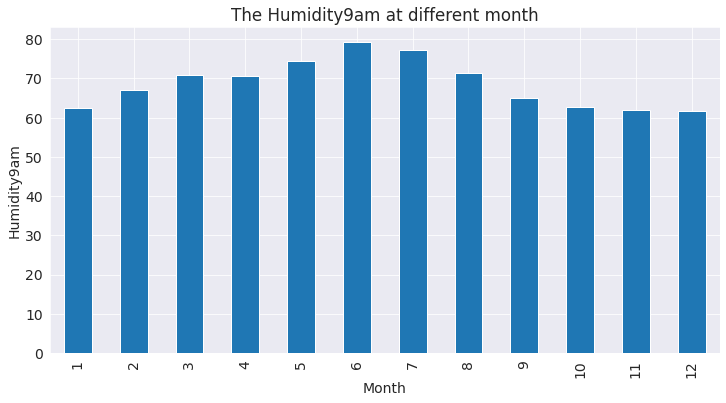

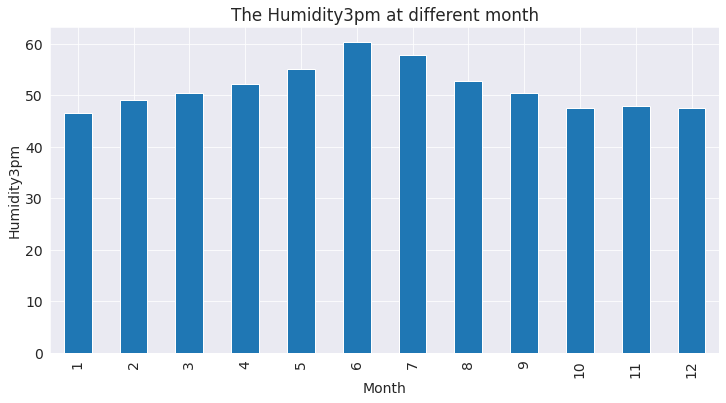

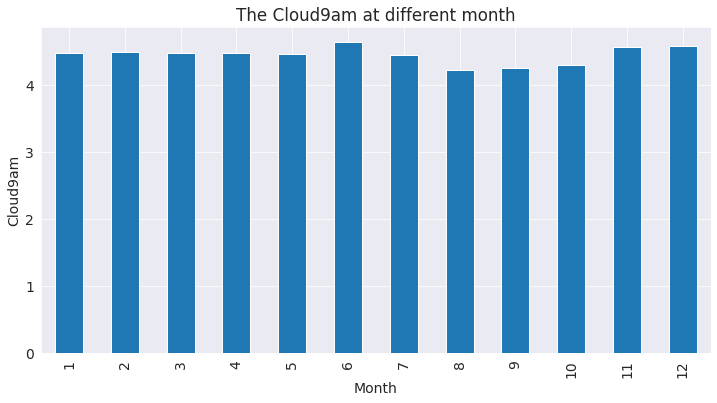

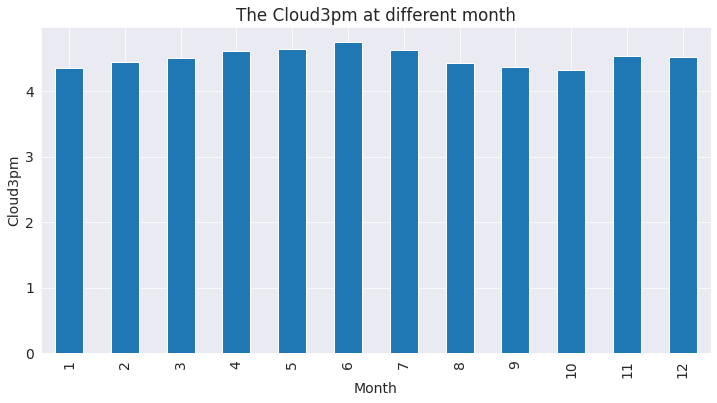

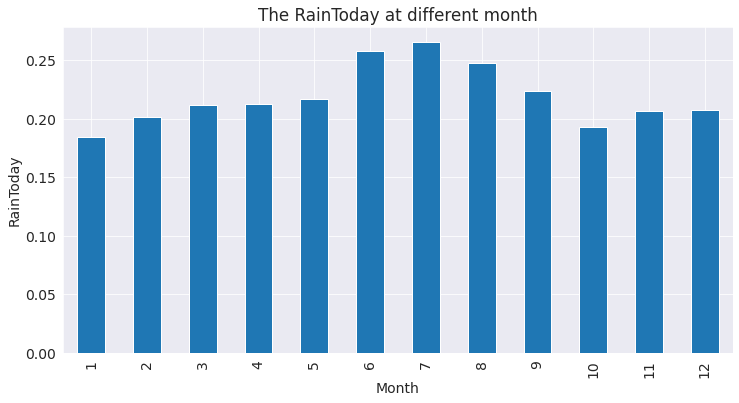

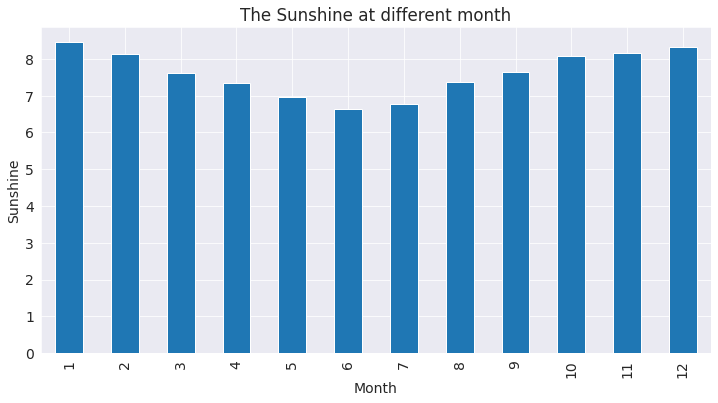

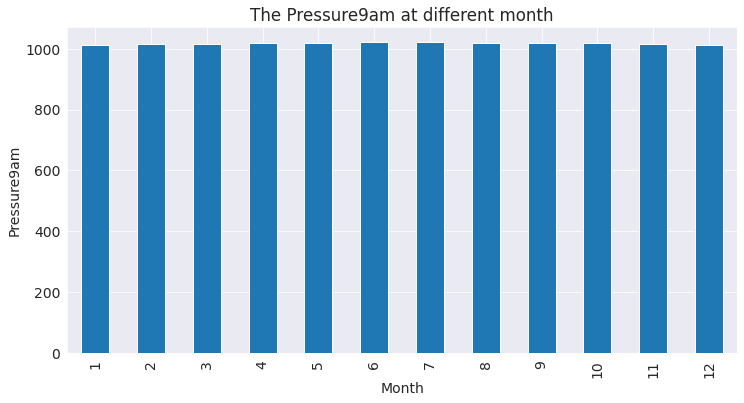

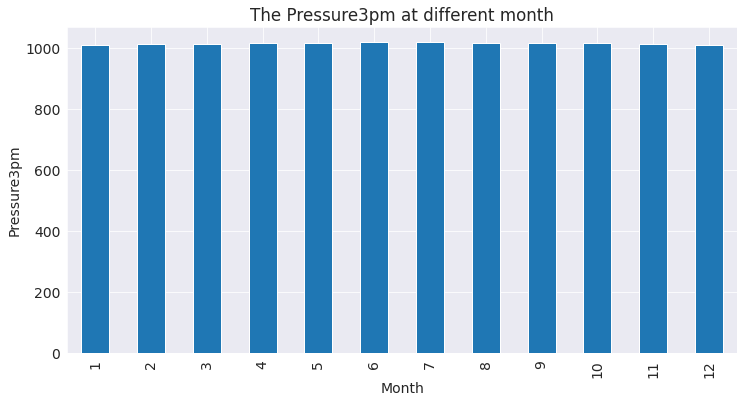

In [95]:
for column in Important_columns:
  plot(column)

In [96]:
weekday_data = df.groupby("Weekday")

In [97]:
def plot(data):
  plt.ylabel(data)
  plt.title("The {} at different weekday".format(data))
  result = weekday_data[data].mean()
  result.plot(kind='bar')
  plt.show()

In [98]:
column_list = ['MinTemp', 'MaxTemp']

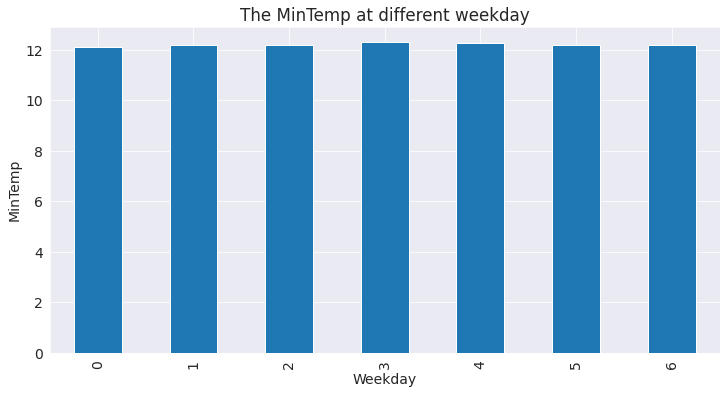

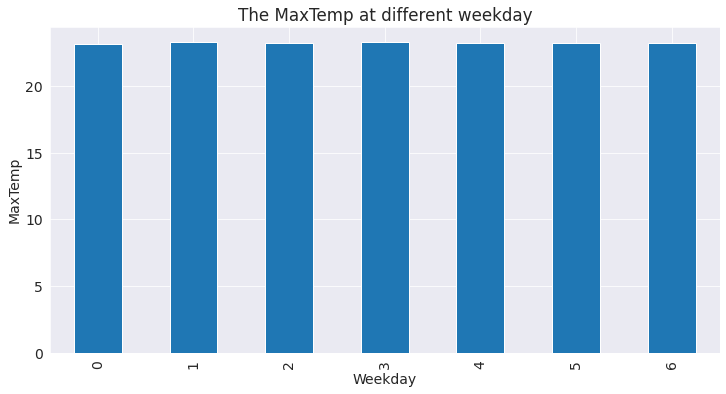

In [99]:
for column in column_list:
  plot(column)

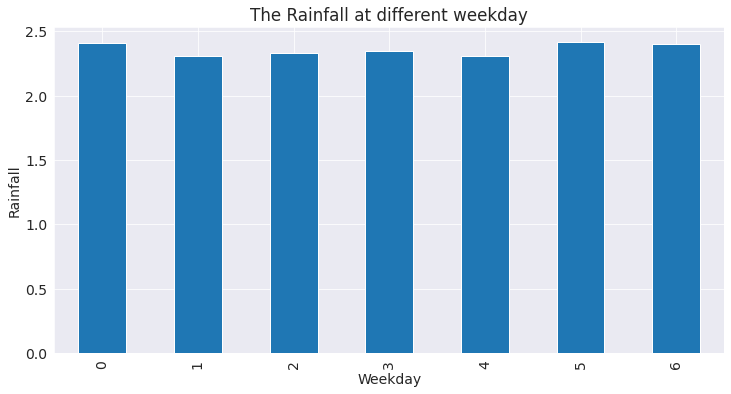

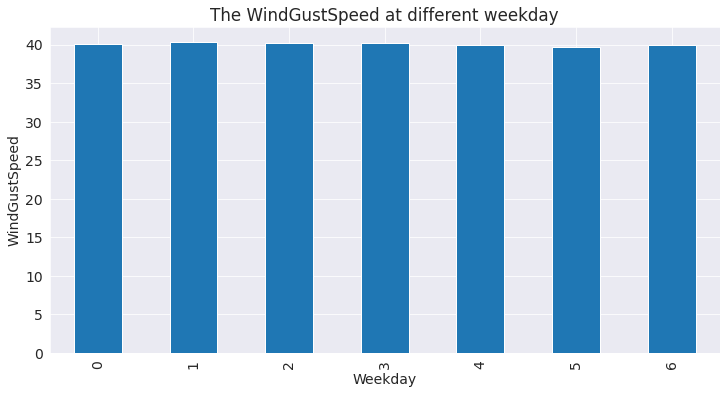

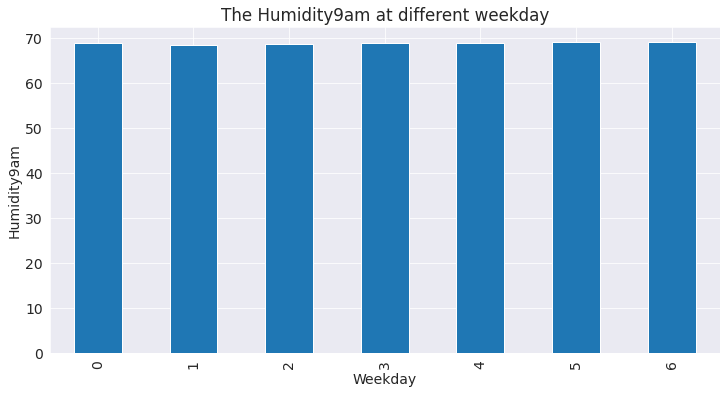

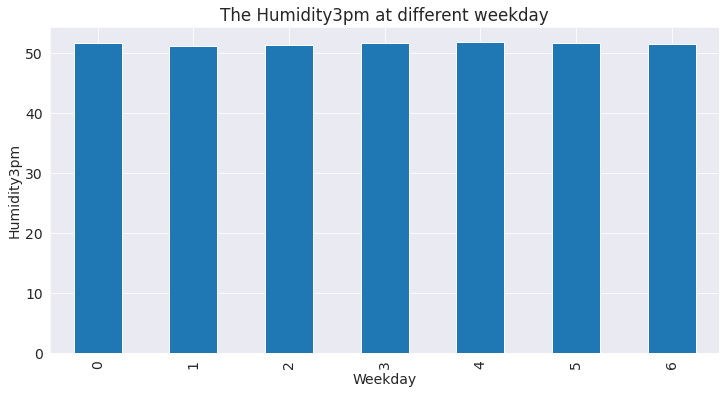

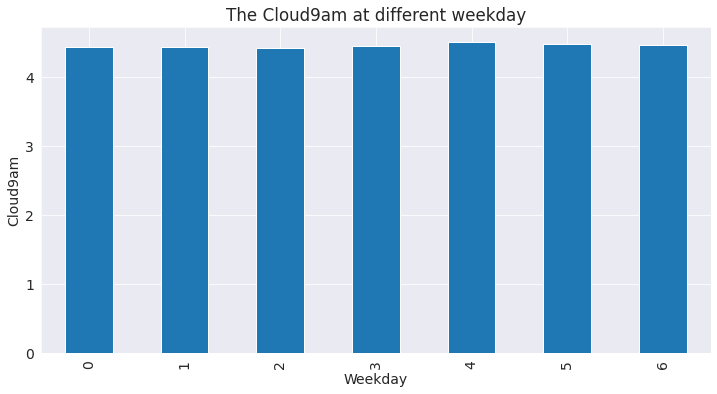

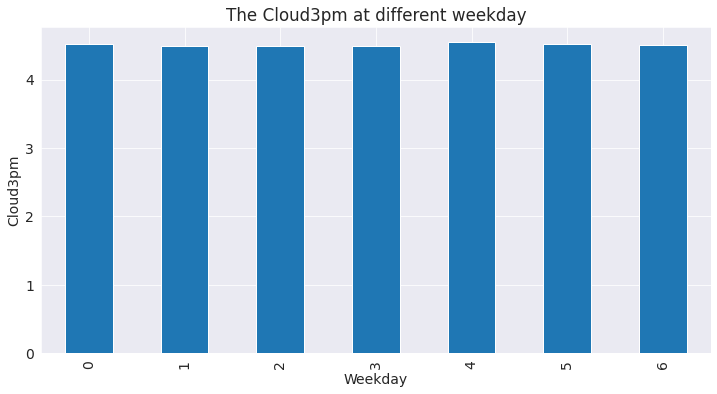

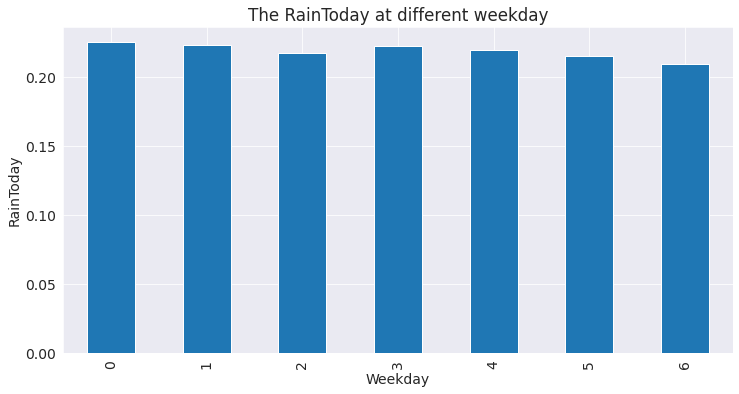

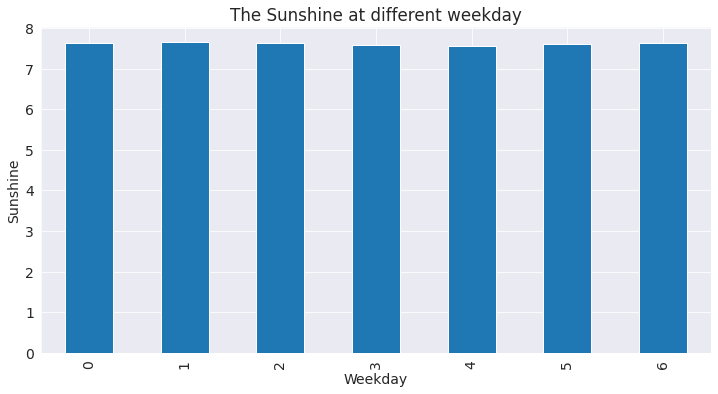

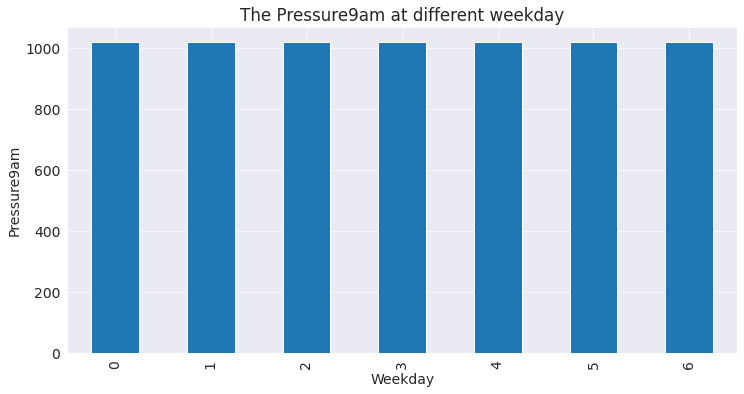

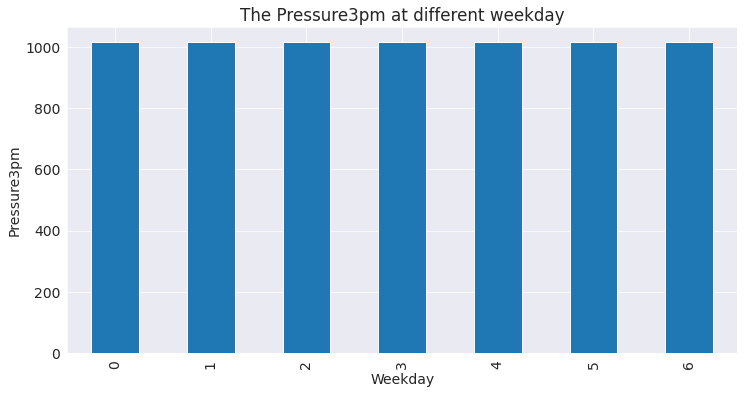

In [100]:
for column in Important_columns:
  plot(column)

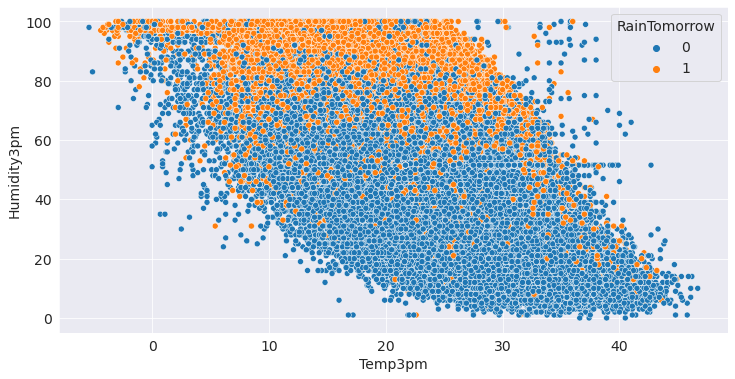

In [101]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Temp3pm'], y=df['Humidity3pm'], hue=df['RainTomorrow']);

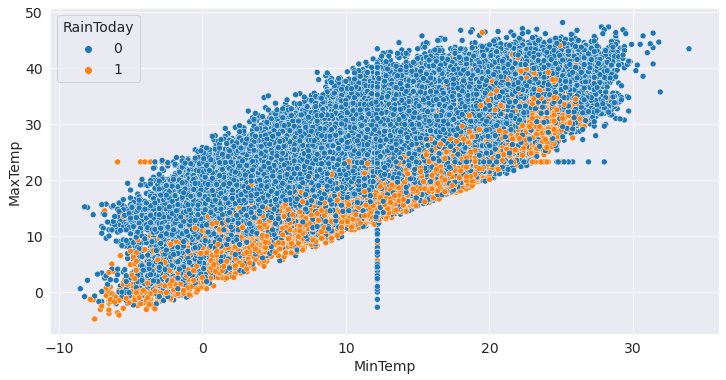

In [102]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['MinTemp'], y=df['MaxTemp'], hue=df['RainToday']);

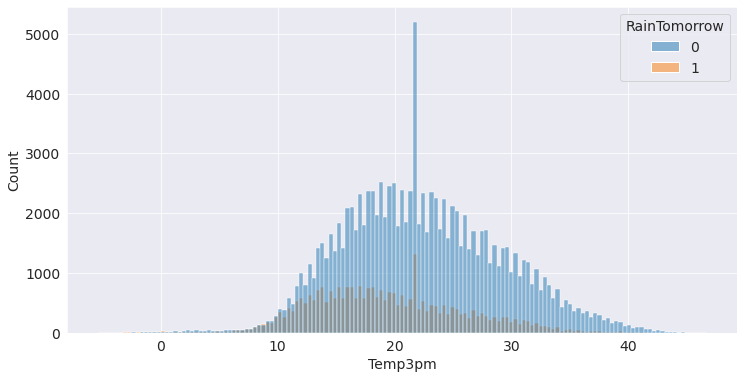

In [103]:
plt.figure(figsize=(12, 6))
sns.histplot(x=df['Temp3pm'], hue=df['RainTomorrow']);